In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer


In [2]:
df=pd.read_csv('C:/Users/91954/data science pg program/Project-Housing--2-/Project-Housing_splitted/train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
df_test=pd.read_csv('C:/Users/91954/data science pg program/Project-Housing--2-/Project-Housing_splitted/test.csv')
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

## Feature Engineering

In [4]:
dfc=df

In [5]:
dft=df_test

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
#lets see columns one by one in numeric data

In [9]:
df=df.drop(columns='Id')

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
df_test=df_test.drop(columns='Id')

In [12]:
df.MSSubClass.unique()

array([120,  20,  60,  50,  70,  30, 160,  85,  45,  90,  40,  80, 190,
        75, 180], dtype=int64)

In [13]:
df.LotFrontage.unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

In [14]:
df.LotFrontage.isnull().sum()

214

In [15]:

si=SimpleImputer()
knn=KNNImputer()
ite=IterativeImputer()

In [16]:
ot=make_column_transformer((si,['LotFrontage']),remainder='passthrough')
df.LotFrontage=ot.fit_transform(df)

In [17]:
df['LotFrontage']=df['LotFrontage'].astype(int)

In [18]:
df.LotFrontage.isnull().sum()

0

In [19]:
df_test.LotFrontage.isnull().sum()

45

In [20]:
ot=make_column_transformer((si,['LotFrontage']),remainder='passthrough')
df_test.LotFrontage=ot.fit_transform(df_test)

In [21]:
df_test.LotFrontage.isnull().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   int32  
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [23]:
df.GarageYrBlt.isnull().sum()

64

In [24]:
df_test.GarageYrBlt.isnull().sum()

17

In [25]:
df.GarageYrBlt.unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948.,   nan,
       1964., 1920., 1930., 1968., 1946., 1992., 1936., 1967., 1989.,
       1959., 1966., 1916., 1941., 1998., 1962., 1926., 1925., 1983.,
       1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945., 1995.,
       1981., 1994., 1949., 1996., 1921., 1963., 1938., 1958., 1935.,
       1940., 1990., 1910., 1954., 1927., 2009., 1986., 1929., 1984.,
       1973., 1924., 1942., 1900., 1931., 1951., 1934., 1972., 1932.,
       1928., 1918., 1908., 1933., 1906., 1914., 1952., 1915.])

In [26]:
si=SimpleImputer(strategy="constant")

In [27]:
ot=make_column_transformer((si,['GarageYrBlt']),remainder='passthrough')
df.GarageYrBlt=ot.fit_transform(df)

In [28]:
ot=make_column_transformer((si,['GarageYrBlt']),remainder='passthrough')
df_test.GarageYrBlt=ot.fit_transform(df_test)

In [29]:
df.GarageYrBlt.isnull().sum()

0

In [30]:
df_test.Electrical.isnull().sum()

1

In [31]:
df_test.GarageYrBlt.isnull().sum()

0

In [32]:
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)

In [33]:
df.GarageYrBlt.value_counts()

0       64
2006    52
2005    51
2007    40
2003    37
        ..
1927     1
1900     1
1933     1
1908     1
1906     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [34]:
df=df.drop(columns='Utilities')
df_test=df_test.drop(columns='Utilities')

In [35]:
df.MasVnrArea.isnull().sum()

7

In [36]:
si=SimpleImputer(strategy="mean")

In [37]:
ot=make_column_transformer((si,['MasVnrArea']),remainder='passthrough')
df.MasVnrArea=ot.fit_transform(df)

In [38]:
df.MasVnrArea=df['MasVnrArea'].astype(int)

In [39]:
df.MasVnrArea.dtype

dtype('int32')

In [40]:
df_test.MasVnrArea.isnull().sum()

1

In [41]:
dft.MasVnrArea.value_counts()

0.0      169
16.0       3
270.0      3
200.0      3
108.0      3
        ... 
240.0      1
74.0       1
236.0      1
579.0      1
436.0      1
Name: MasVnrArea, Length: 104, dtype: int64

In [42]:
df_test["MasVnrArea"].fillna(0, inplace = True)

In [43]:
df_test.MasVnrArea.isnull().sum()

0

In [44]:
df_test.MasVnrArea.value_counts()

0.0      170
16.0       3
270.0      3
200.0      3
108.0      3
        ... 
240.0      1
74.0       1
236.0      1
579.0      1
436.0      1
Name: MasVnrArea, Length: 104, dtype: int64

In [45]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [46]:
df.Alley.value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [47]:
df.Alley

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1163     NaN
1164     NaN
1165     NaN
1166    Pave
1167     NaN
Name: Alley, Length: 1168, dtype: object

In [48]:
df["Alley"].fillna("No Access", inplace = True)
  

In [49]:
df_test.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [50]:
df_test["Alley"].fillna("No Access", inplace = True)

In [51]:
df_test.Alley.isnull().sum()

0

In [52]:
df.MasVnrType.unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [53]:
df.MasVnrType.isnull().sum()

7

In [54]:
si=SimpleImputer(strategy='most_frequent')

In [55]:
ot=make_column_transformer((si,['MasVnrType']),remainder='passthrough')
df.MasVnrType=ot.fit_transform(df)

In [56]:
df.MasVnrType.isnull().sum()

0

In [57]:
df.MasVnrType.unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [58]:
df_test.MasVnrType.unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn'], dtype=object)

In [59]:
df_test.MasVnrType.isnull().sum()

1

In [60]:
df_test.MasVnrType.value_counts()

None       168
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64

In [61]:
df_test["MasVnrType"].fillna("None", inplace = True)

In [62]:
df["BsmtQual"].fillna("No Basement", inplace = True)

In [63]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [64]:
df_test.BsmtQual.unique()

array(['Ex', 'Gd', 'TA', nan, 'Fa'], dtype=object)

In [65]:
df_test["BsmtQual"].fillna("No Basement", inplace = True)

In [66]:
df_test.BsmtQual.isnull().sum()

0

In [67]:
df_test.BsmtQual.value_counts()

TA             132
Gd             120
Ex              27
No Basement      7
Fa               6
Name: BsmtQual, dtype: int64

In [68]:
df.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [69]:
df["BsmtCond"].fillna("No Basement", inplace = True)

In [70]:
df.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', 'No Basement', 'Po'], dtype=object)

In [71]:
df_test["BsmtCond"].fillna("No Basement", inplace = True)

In [72]:
df_test.BsmtCond.unique()

array(['TA', 'Gd', 'No Basement', 'Fa'], dtype=object)

In [73]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [74]:
df["BsmtExposure"].fillna("No Basement", inplace = True)

In [75]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Av', 'Mn', 'No Basement'], dtype=object)

In [76]:
df_test["BsmtExposure"].fillna("No Basement", inplace = True)

In [77]:
df_test.BsmtExposure.unique()

array(['Gd', 'Av', 'No', 'Mn', 'No Basement'], dtype=object)

In [78]:
df_test.Electrical.unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [79]:
df_test["Electrical"].fillna("SBrkr", inplace = True)

In [80]:
df.BsmtFinType1.unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [81]:
df["BsmtFinType1"].fillna("No Basement", inplace = True)

In [82]:
df_test["BsmtFinType1"].fillna("No Basement", inplace = True)

In [83]:
df["BsmtFinType2"].fillna("No Basement", inplace = True)

In [84]:
df_test["BsmtFinType2"].fillna("No Basement", inplace = True)

In [85]:
df["FireplaceQu"].fillna("No Fireplace", inplace = True)

In [86]:
df.FireplaceQu.unique()

array(['TA', 'Gd', 'No Fireplace', 'Fa', 'Ex', 'Po'], dtype=object)

In [87]:
df_test["FireplaceQu"].fillna("No Fireplace", inplace = True)

In [88]:
df.GarageType.unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [89]:
df["GarageType"].fillna("No garage", inplace = True)

In [90]:
df_test["GarageType"].fillna("No garage", inplace = True)

In [91]:
df["GarageFinish"].fillna("No garage", inplace = True)

In [92]:
df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'No garage'], dtype=object)

In [93]:
df_test["GarageFinish"].fillna("No garage", inplace = True)

In [94]:
df.GarageQual.unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [95]:
df["GarageQual"].fillna("No garage", inplace = True)

In [96]:
df_test["GarageQual"].fillna("No garage", inplace = True)

In [97]:
df["GarageCond"].fillna("No garage", inplace = True)

In [98]:
df.GarageCond.unique()

array(['TA', 'Fa', 'Gd', 'No garage', 'Po', 'Ex'], dtype=object)

In [99]:
df_test["GarageCond"].fillna("No garage", inplace = True)

In [100]:
df.PoolQC.unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [101]:
df["PoolQC"].fillna("No pool", inplace = True)

In [102]:
df_test["PoolQC"].fillna("No pool", inplace = True)

In [103]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [104]:
df["Fence"].fillna("No fence", inplace = True)

In [105]:
df_test["Fence"].fillna("No fence", inplace = True)

In [106]:
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [107]:
df["MiscFeature"].fillna("Na", inplace = True)

In [108]:
df.MasVnrArea=df['MasVnrArea'].astype('int')

In [109]:
df_test["MiscFeature"].fillna("Na", inplace = True)
df_test.MasVnrArea=df['MasVnrArea'].astype('int')

In [110]:
'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType'

('RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType')

In [111]:
'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'

('OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd')

In [112]:
df.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

In [113]:
df.OverallCond.unique()

array([5, 6, 7, 4, 8, 2, 3, 9, 1], dtype=int64)

In [114]:
df.YearBuilt.unique()

array([1976, 1970, 1996, 1977, 2006, 1957, 1965, 1947, 1937, 2003, 1960,
       1955, 1923, 1930, 2007, 2001, 1972, 1950, 1961, 1953, 1918, 2010,
       1922, 1934, 2005, 1946, 1941, 1948, 1975, 1978, 1956, 2004, 1982,
       2000, 2002, 1920, 1992, 1936, 1967, 1989, 1929, 1968, 1959, 1935,
       1966, 1931, 1916, 1998, 1962, 1974, 1926, 1904, 1995, 1969, 1985,
       1963, 1958, 1892, 2008, 1971, 1980, 1945, 1986, 1981, 1949, 1940,
       1954, 1925, 1915, 1921, 1924, 1999, 1951, 1993, 1964, 1900, 1919,
       1910, 1938, 1880, 1988, 1911, 1990, 1979, 1927, 1983, 1994, 2009,
       1928, 1917, 1898, 1997, 1984, 1973, 1952, 1939, 1987, 1890, 1942,
       1991, 1932, 1908, 1914, 1882, 1905, 1875, 1906, 1893, 1912, 1913],
      dtype=int64)

In [115]:
df.YearRemodAdd.unique()

array([1976, 1970, 1997, 1977, 2000, 2006, 1996, 1965, 1950, 2003, 1960,
       1955, 2007, 2001, 1961, 1998, 1953, 2010, 1995, 2005, 1992, 1975,
       1978, 1982, 2002, 1989, 1967, 1968, 1959, 2004, 1966, 2008, 1987,
       1981, 1969, 1985, 1963, 1991, 1993, 1971, 1990, 1956, 1986, 1999,
       1954, 1957, 1994, 1972, 1958, 1980, 1979, 1951, 1983, 2009, 1962,
       1964, 1952, 1984, 1988, 1974, 1973], dtype=int64)

In [116]:
df.OverallQual=df['OverallQual'].astype('O')
df_test.OverallQual=df['OverallQual'].astype('O')
df.OverallCond=df['OverallCond'].astype('O')
df_test.OverallCond=df['OverallCond'].astype('O')

In [122]:
df.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [123]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [119]:
#we have filled the data

## Eda

In [125]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])



<ipython-input-126-ae06a28adb9d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,20))


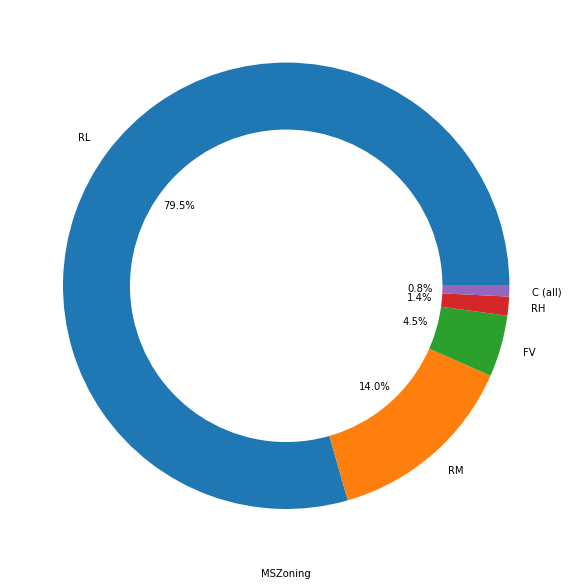

<Figure size 432x288 with 0 Axes>

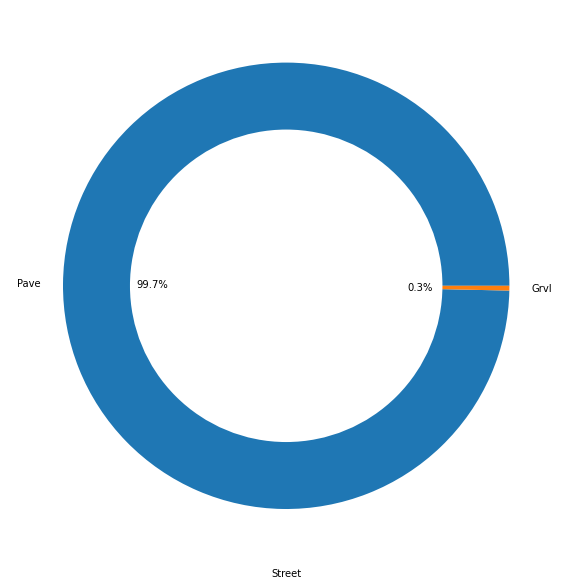

<Figure size 432x288 with 0 Axes>

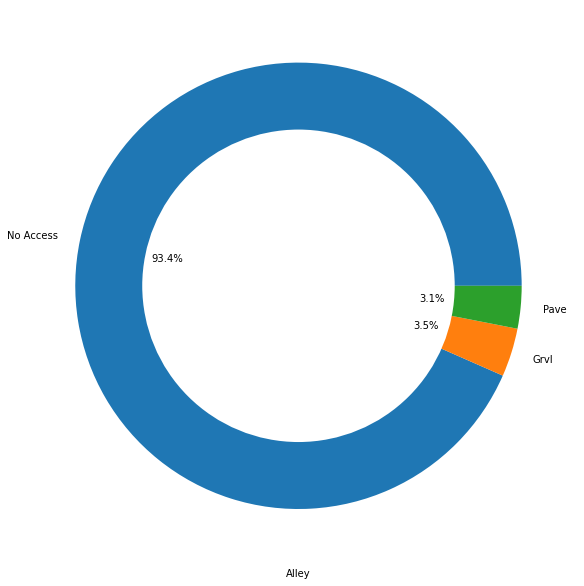

<Figure size 432x288 with 0 Axes>

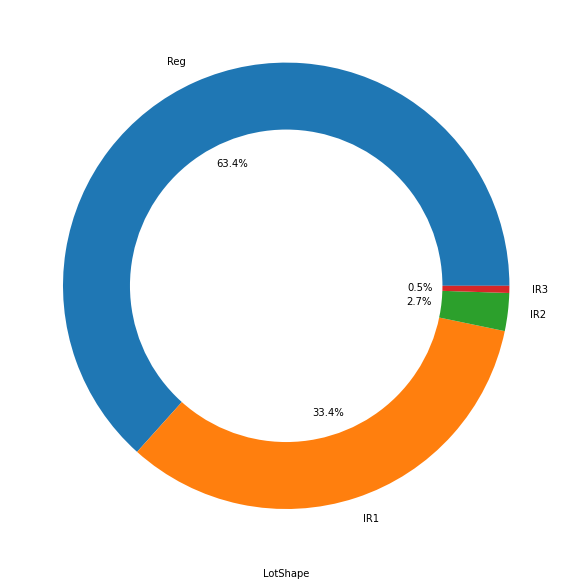

<Figure size 432x288 with 0 Axes>

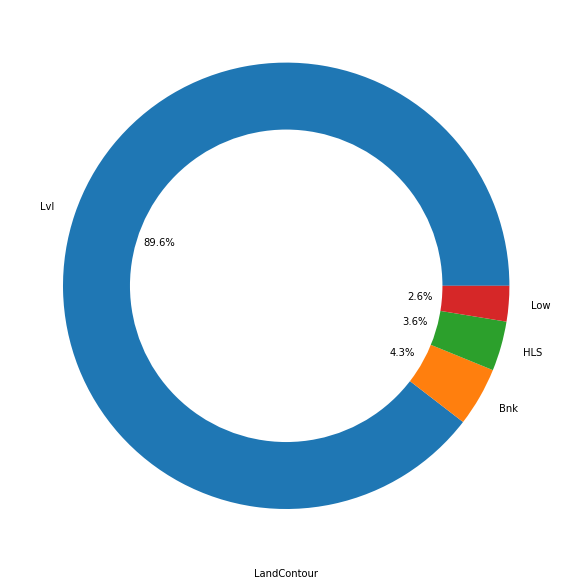

<Figure size 432x288 with 0 Axes>

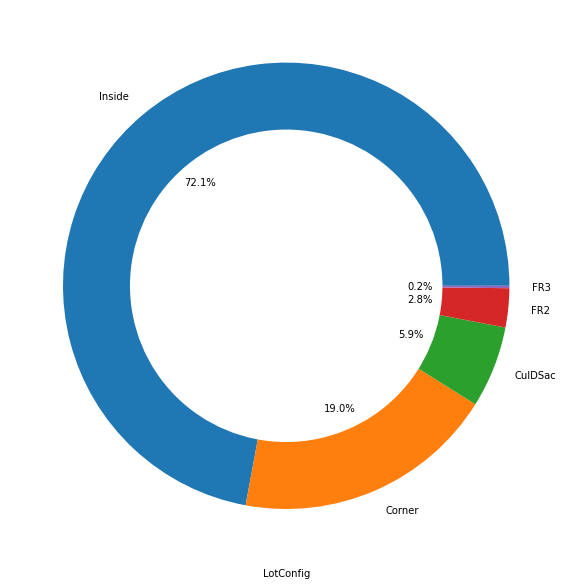

<Figure size 432x288 with 0 Axes>

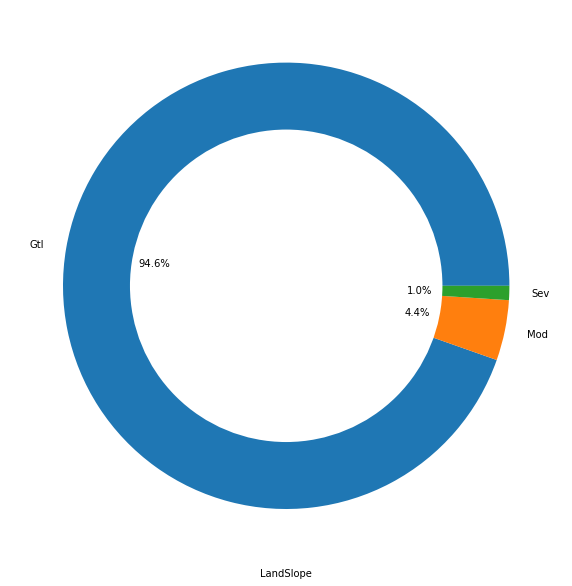

<Figure size 432x288 with 0 Axes>

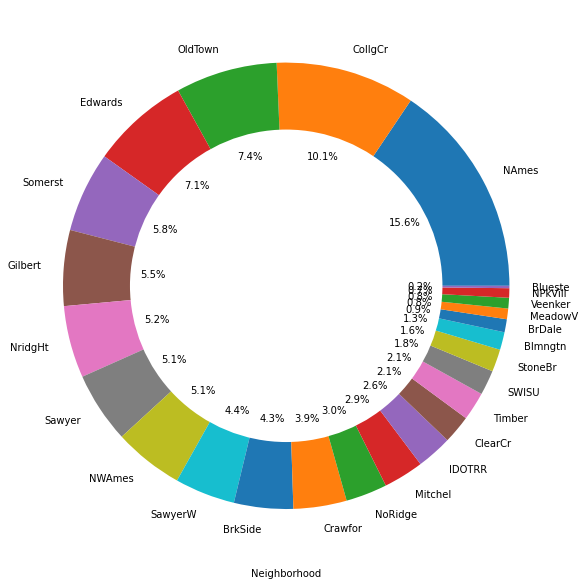

<Figure size 432x288 with 0 Axes>

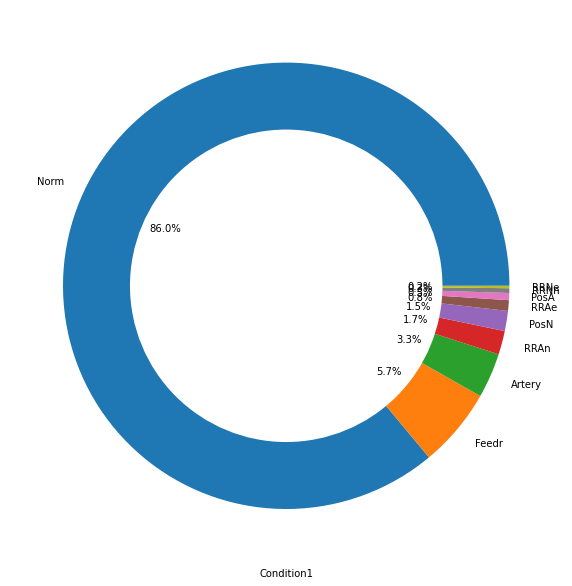

<Figure size 432x288 with 0 Axes>

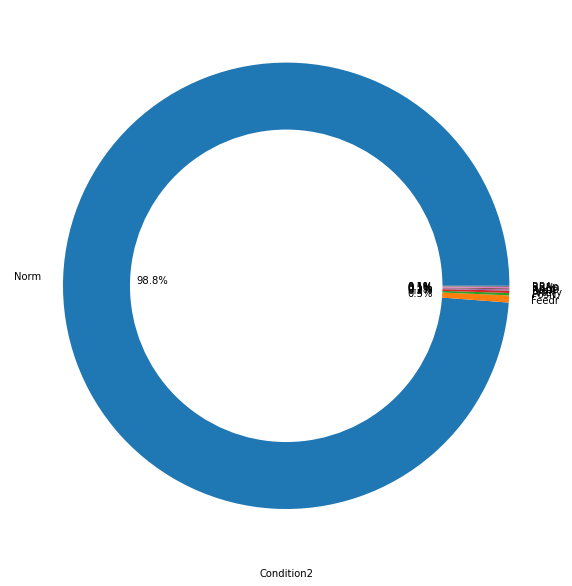

<Figure size 432x288 with 0 Axes>

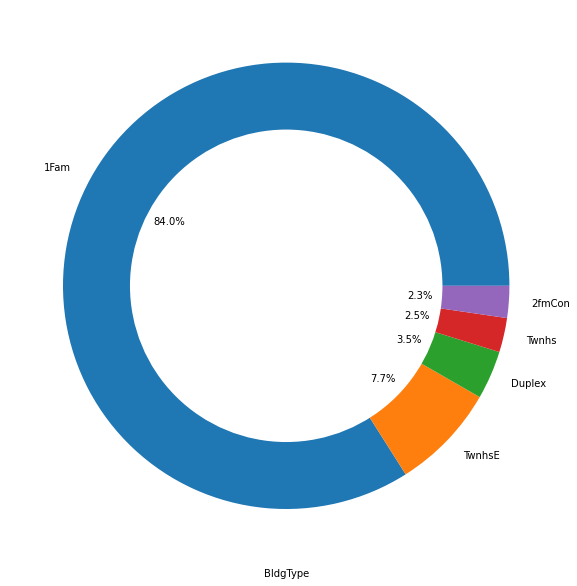

<Figure size 432x288 with 0 Axes>

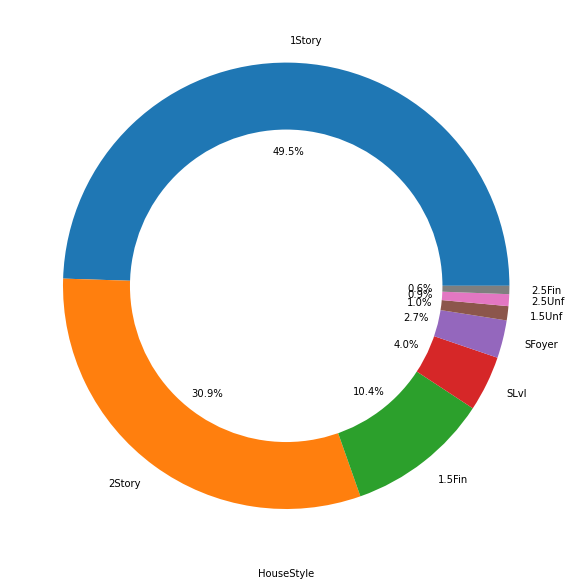

<Figure size 432x288 with 0 Axes>

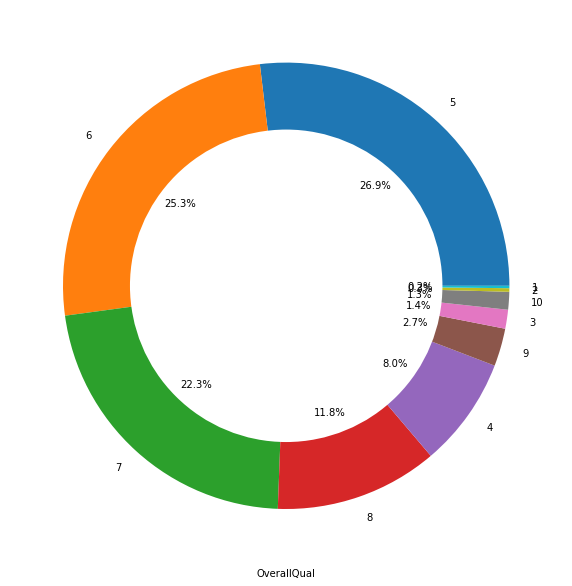

<Figure size 432x288 with 0 Axes>

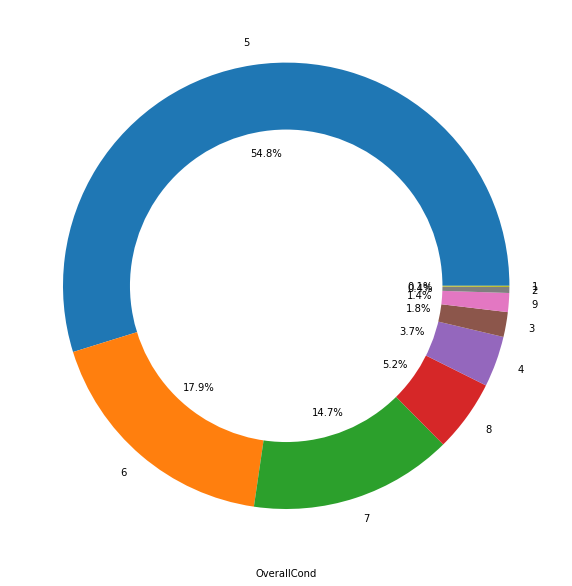

<Figure size 432x288 with 0 Axes>

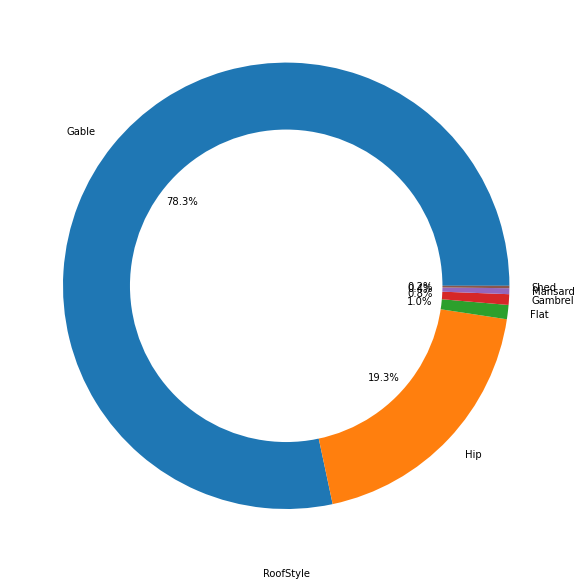

<Figure size 432x288 with 0 Axes>

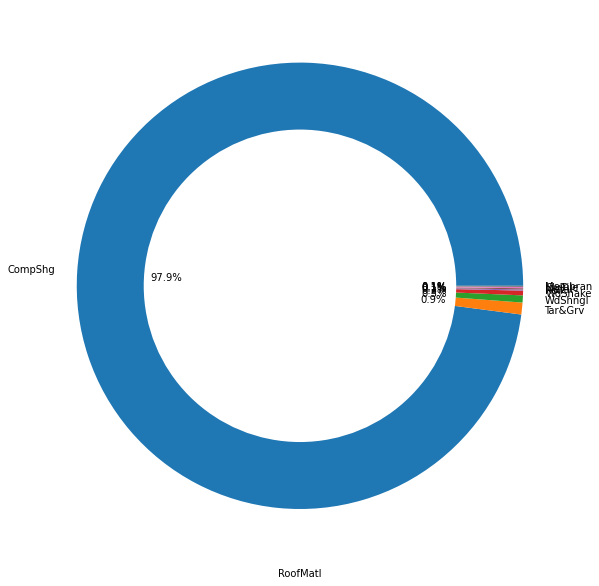

<Figure size 432x288 with 0 Axes>

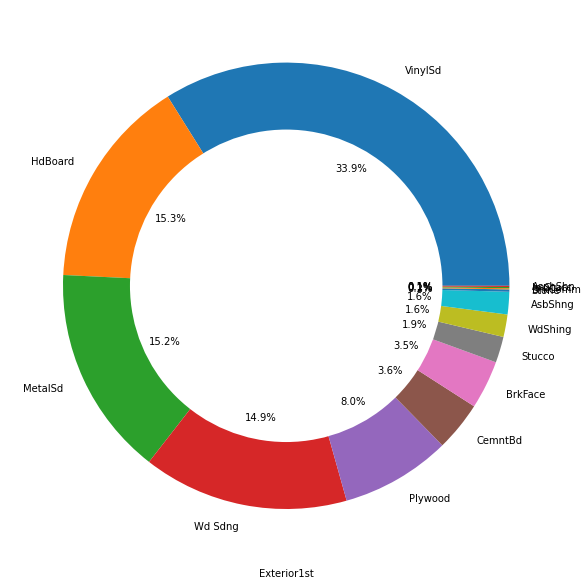

<Figure size 432x288 with 0 Axes>

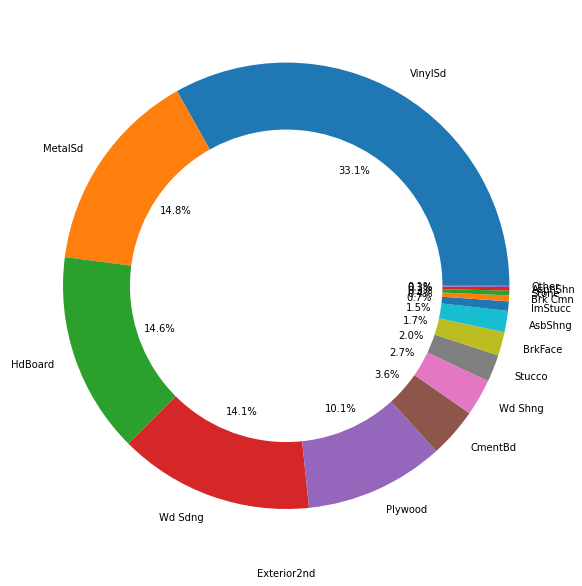

<Figure size 432x288 with 0 Axes>

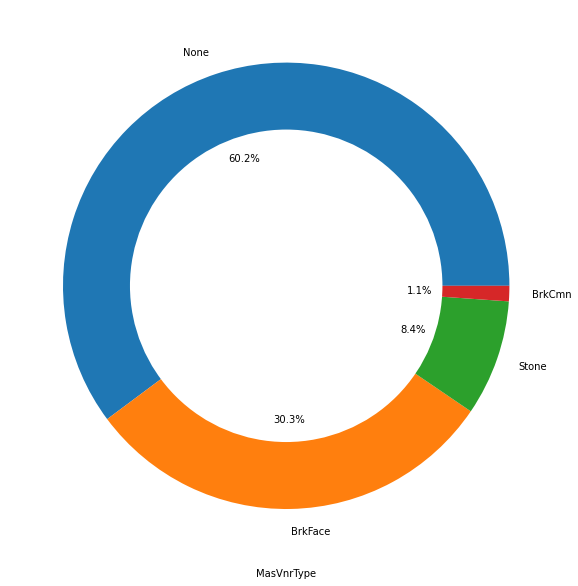

<Figure size 432x288 with 0 Axes>

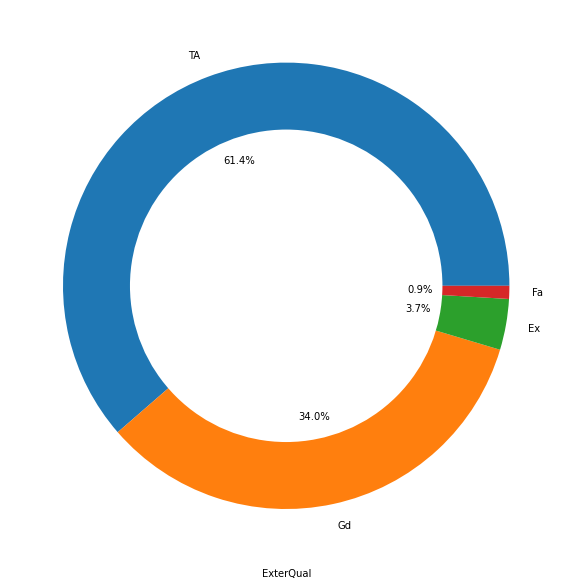

<Figure size 432x288 with 0 Axes>

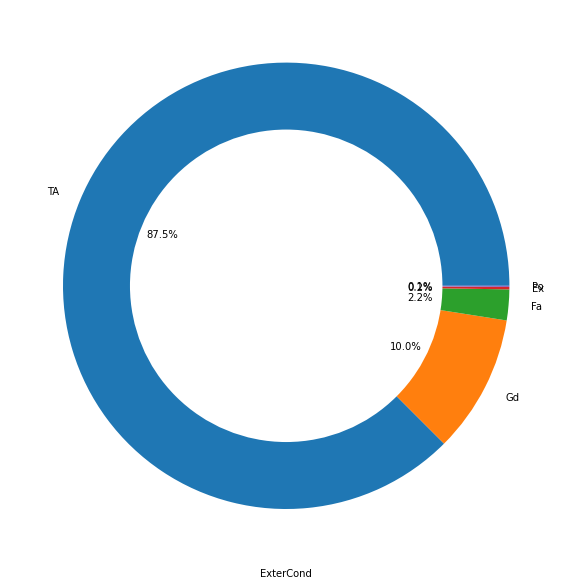

<Figure size 432x288 with 0 Axes>

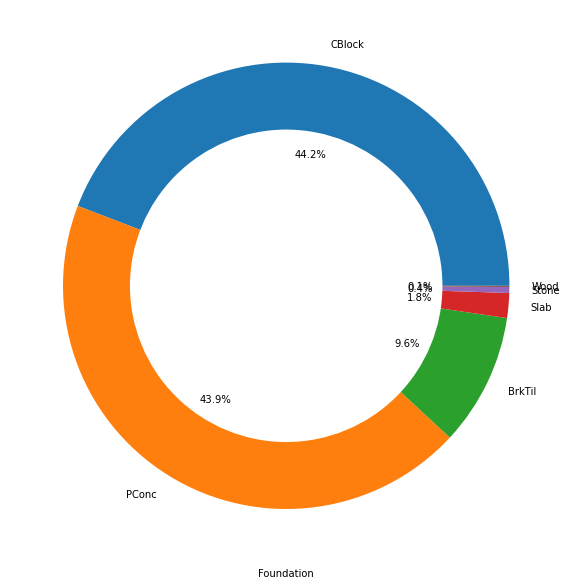

<Figure size 432x288 with 0 Axes>

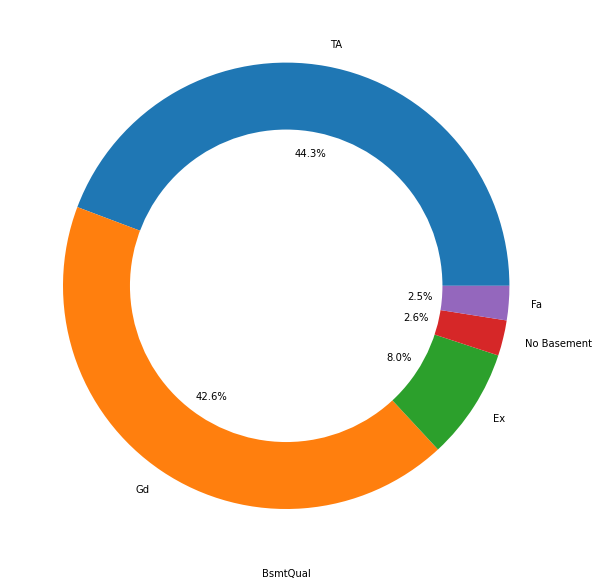

<Figure size 432x288 with 0 Axes>

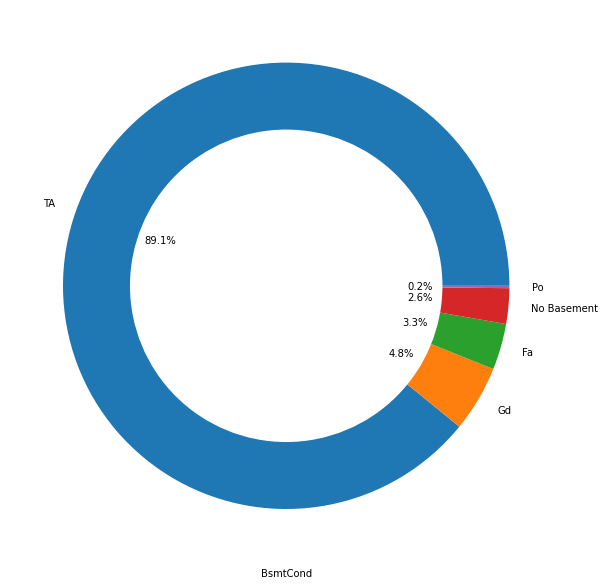

<Figure size 432x288 with 0 Axes>

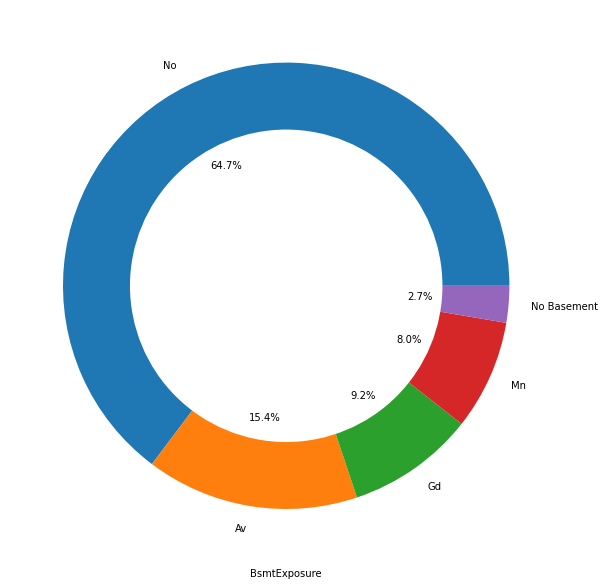

<Figure size 432x288 with 0 Axes>

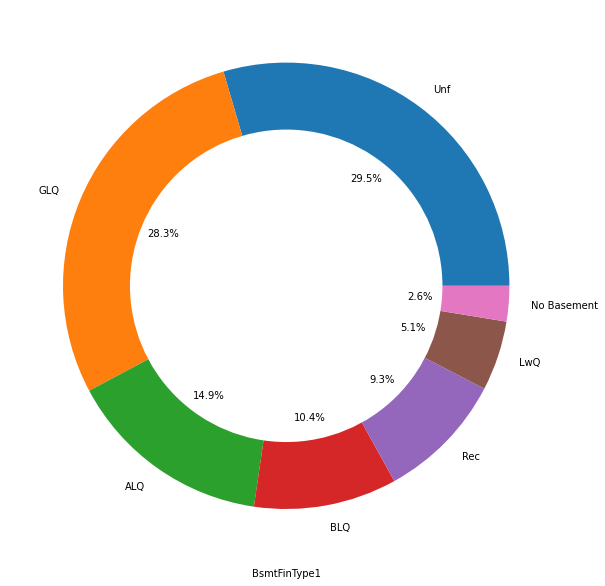

<Figure size 432x288 with 0 Axes>

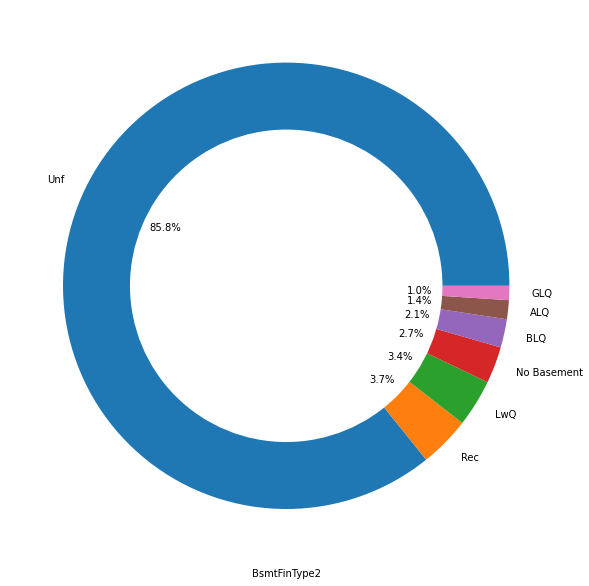

<Figure size 432x288 with 0 Axes>

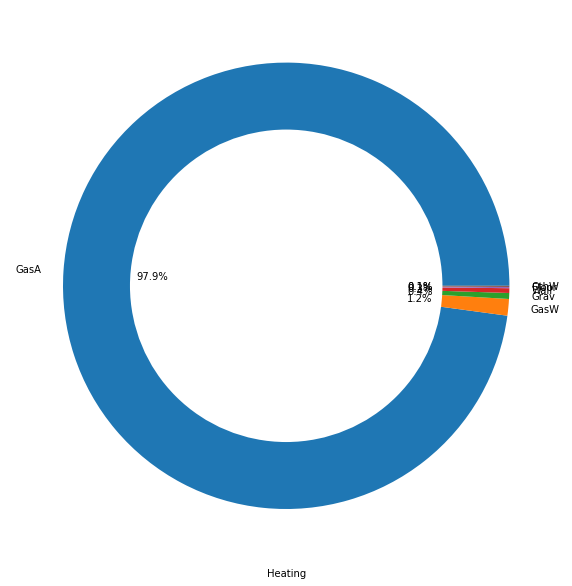

<Figure size 432x288 with 0 Axes>

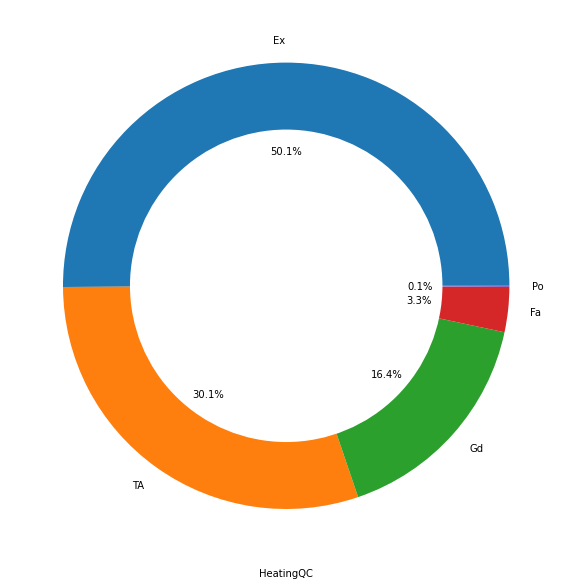

<Figure size 432x288 with 0 Axes>

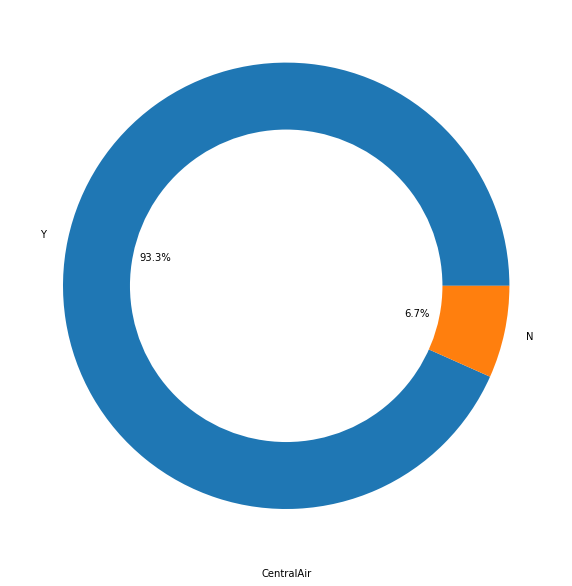

<Figure size 432x288 with 0 Axes>

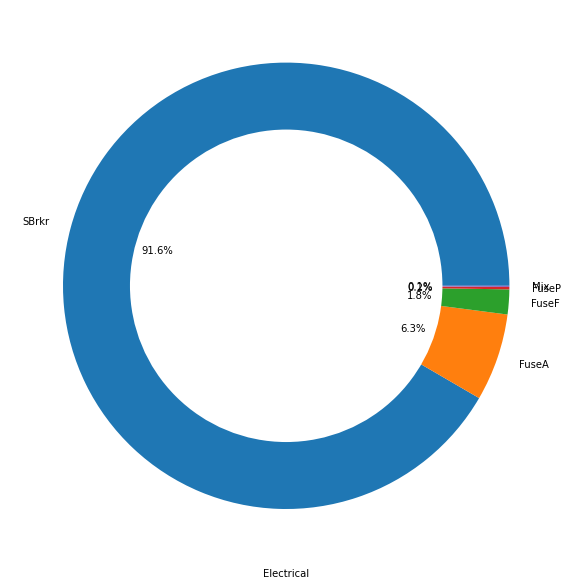

<Figure size 432x288 with 0 Axes>

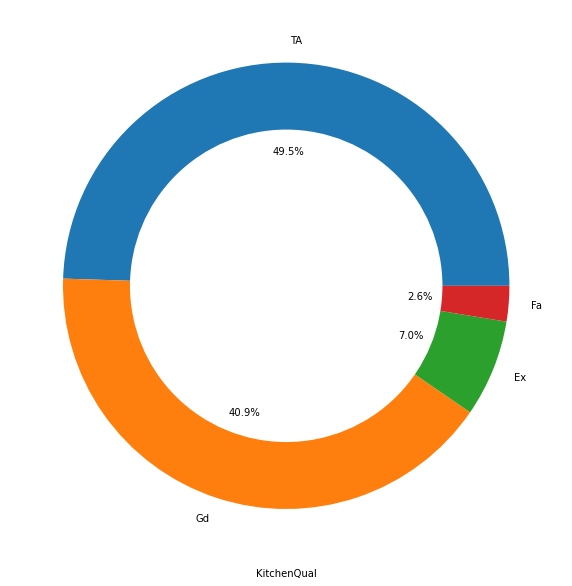

<Figure size 432x288 with 0 Axes>

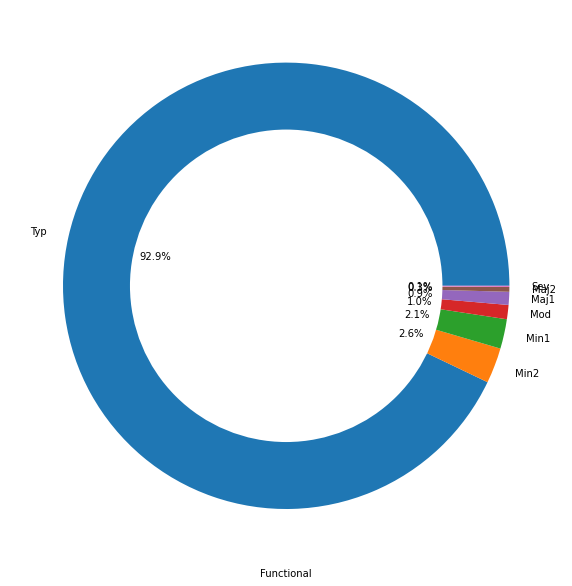

<Figure size 432x288 with 0 Axes>

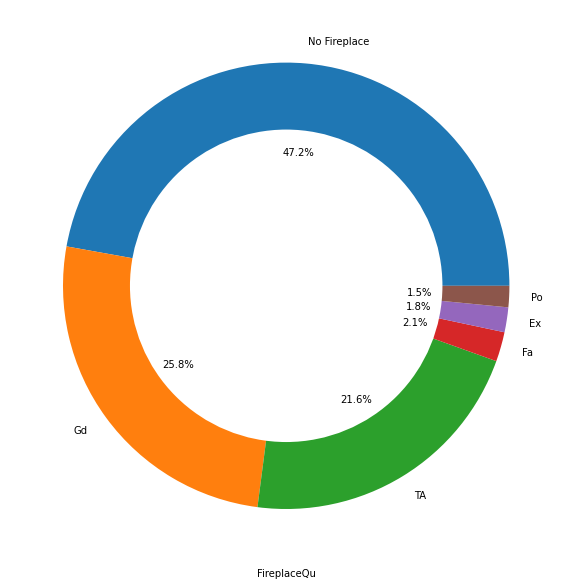

<Figure size 432x288 with 0 Axes>

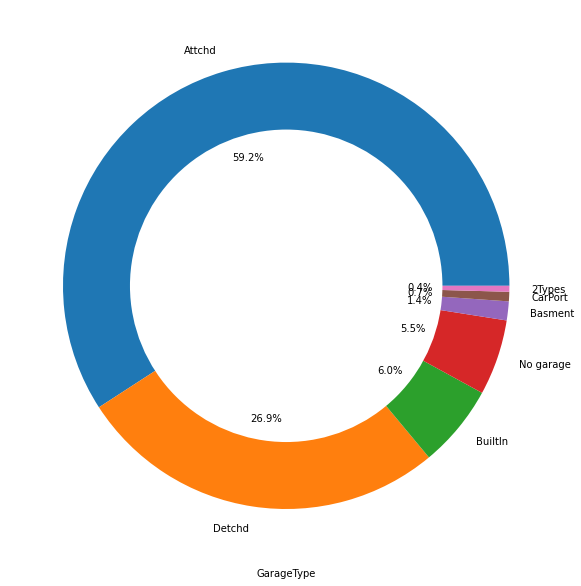

<Figure size 432x288 with 0 Axes>

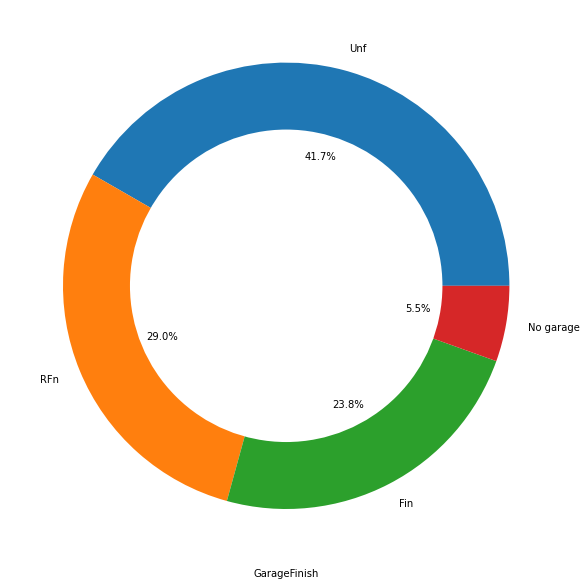

<Figure size 432x288 with 0 Axes>

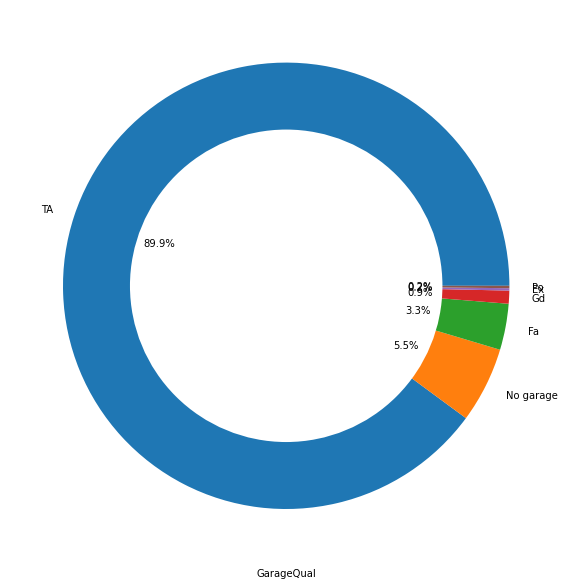

<Figure size 432x288 with 0 Axes>

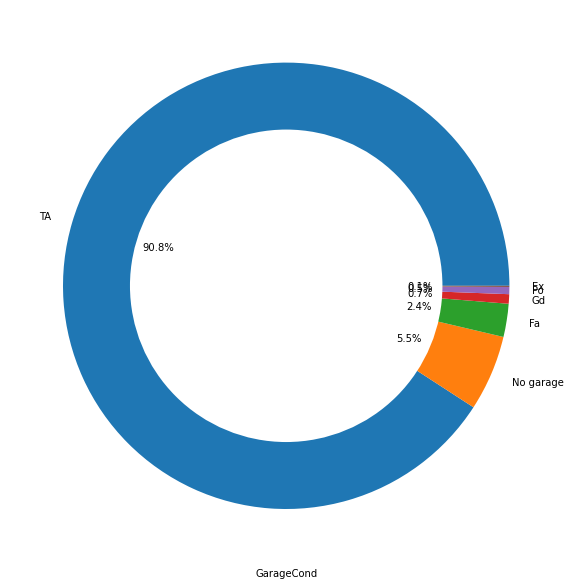

<Figure size 432x288 with 0 Axes>

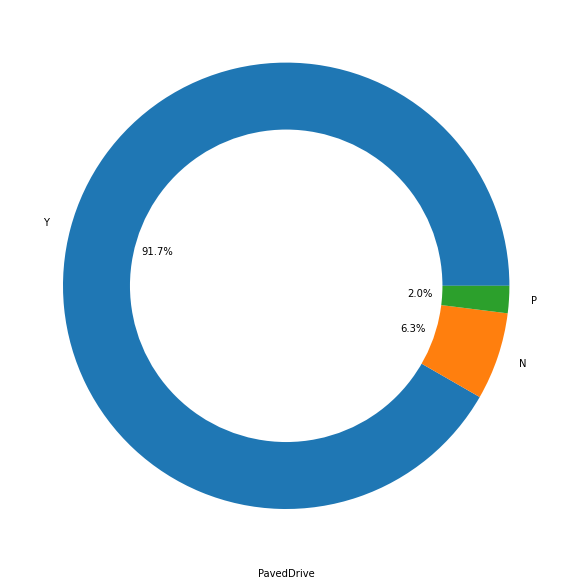

<Figure size 432x288 with 0 Axes>

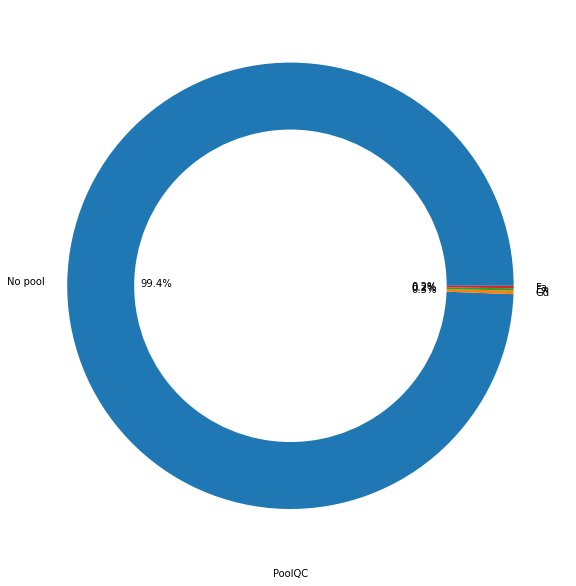

<Figure size 432x288 with 0 Axes>

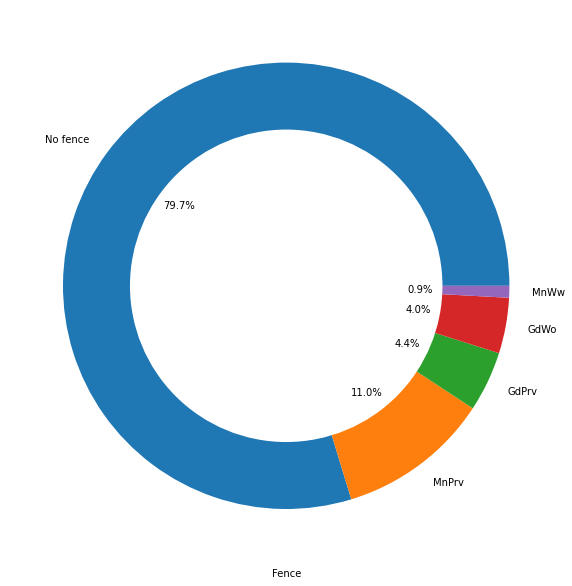

<Figure size 432x288 with 0 Axes>

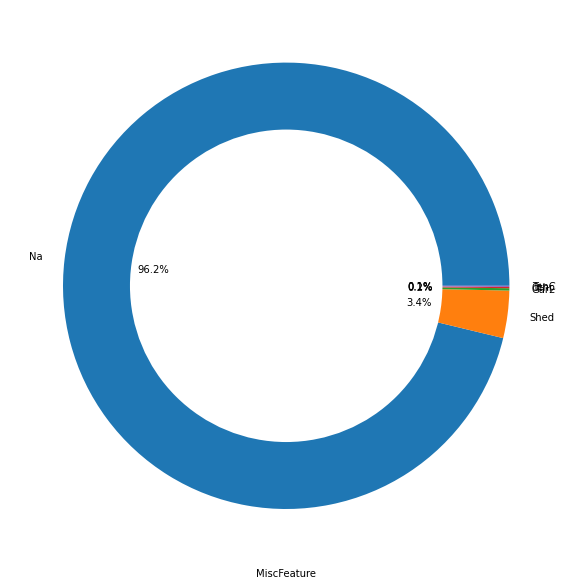

<Figure size 432x288 with 0 Axes>

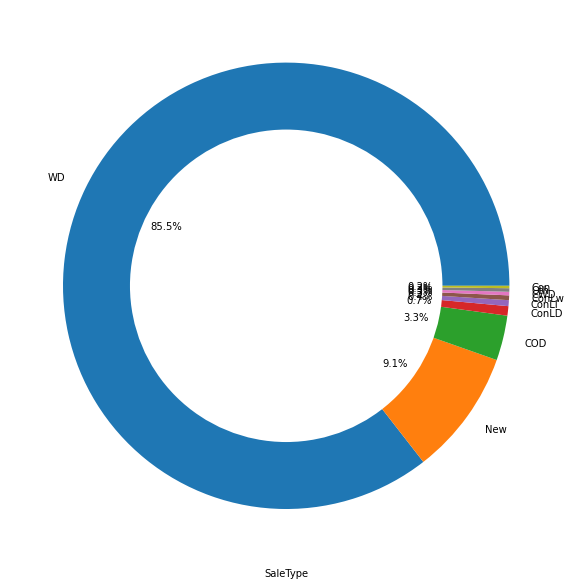

<Figure size 432x288 with 0 Axes>

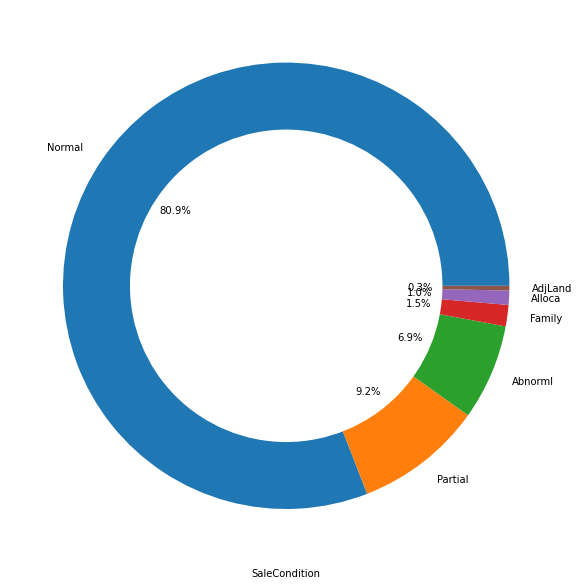

<Figure size 432x288 with 0 Axes>

In [126]:
for i in categorical_data:
    plt.figure(figsize=(10,20))
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

In [127]:
#we can see Residential low density has the highest contributor to sales.
#we can see most are the street are paved to access the property
#we can see most of the properties doest hv alleys
#most of the property are of regular shape
#most of the land in the countour are flat.
#we dont need utility as the column is constant.
#we can see  lot configureit most in  inside.
#we can see that the slope are gentle.
#we can see that these locations are nearer to the property
#we can see that most of tem shows normal.condition1
#we can see that this also shows similar results.condition2
#we can see that most of the property are single family detached or we can say nuclear family.
#we can see a clear difference of choices in the style of the house ,mostly it is divided into 1story,2story,and 1.5fin 
#we can see that OverallQual has a range of 5 to 7 rating 
#we can see that OverallCond has a range of 5 to 7 rating mostly but 5 rating has majority
#we can see most roof style is gable
#most of the roof material is composite shringle or standard shringle.
#Exterior of the house are mostly distributed differently but still Vinyl Siding has the most
#We can see a similar kind of graph for this also
#we can see in Masonry veneer type ,that 60% of the data is none type which simply means that they dont hv masonry veneer
# we can see quantity of material on the exterior is  mostly average and some part has good quantity also.
#we can see that the present condition is also average of most of the exteriors
#We can see mostly the foundation is of Cinder Block and Poured Contrete
#We can see most of the property has average or good height of basement
#we can see the condition of the basement is average mostly
#we can see mostly the basement doesn't have exposure
#We can see that basementfinishtype1 this data is also distributed in many types but we can see Good Living Quarters,Unfinished are most,and somewhat Average Living Quarters also has a better percentage than others.
#Wecan see that basementfinishtype2 is mostly of unfinished condition
#We can see gas a is mostly used for heating
#heating quality is excelent in half of the data and hs average quality in most of the other half.
#most of them has central air condition
#most of them have Standard Circuit Breakers & Romex electrical system
#kitchen quality of those houses are average or good quality mostly
#most of the houses have typical home functioning or we can say standard functioning
#We can see a good number of houses doesn't have fireplaces,and we can also see that those whohave fireplaces mostly have average or good quality fireplaces
#we can see a large amount of the houses have garage attached ,and also a good amount of houses have detached garage also.
#We can see from this data is the garage work of most of the houses are either roughly finished or unfinished
#Most of the houses have average garage quality
#Most of the garage has average garage condition , we can see some similarity witth above column reference
#Most of the houses have paved driveway
#most of the houses doesn't have a pool
#most of the fence gives an mimimum privacy
#none category has most which shows mislleneous are not have much data
#most of the houses haveWarranty Deed - Conventional as the sales type
#most of the houses normal sales condition.

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

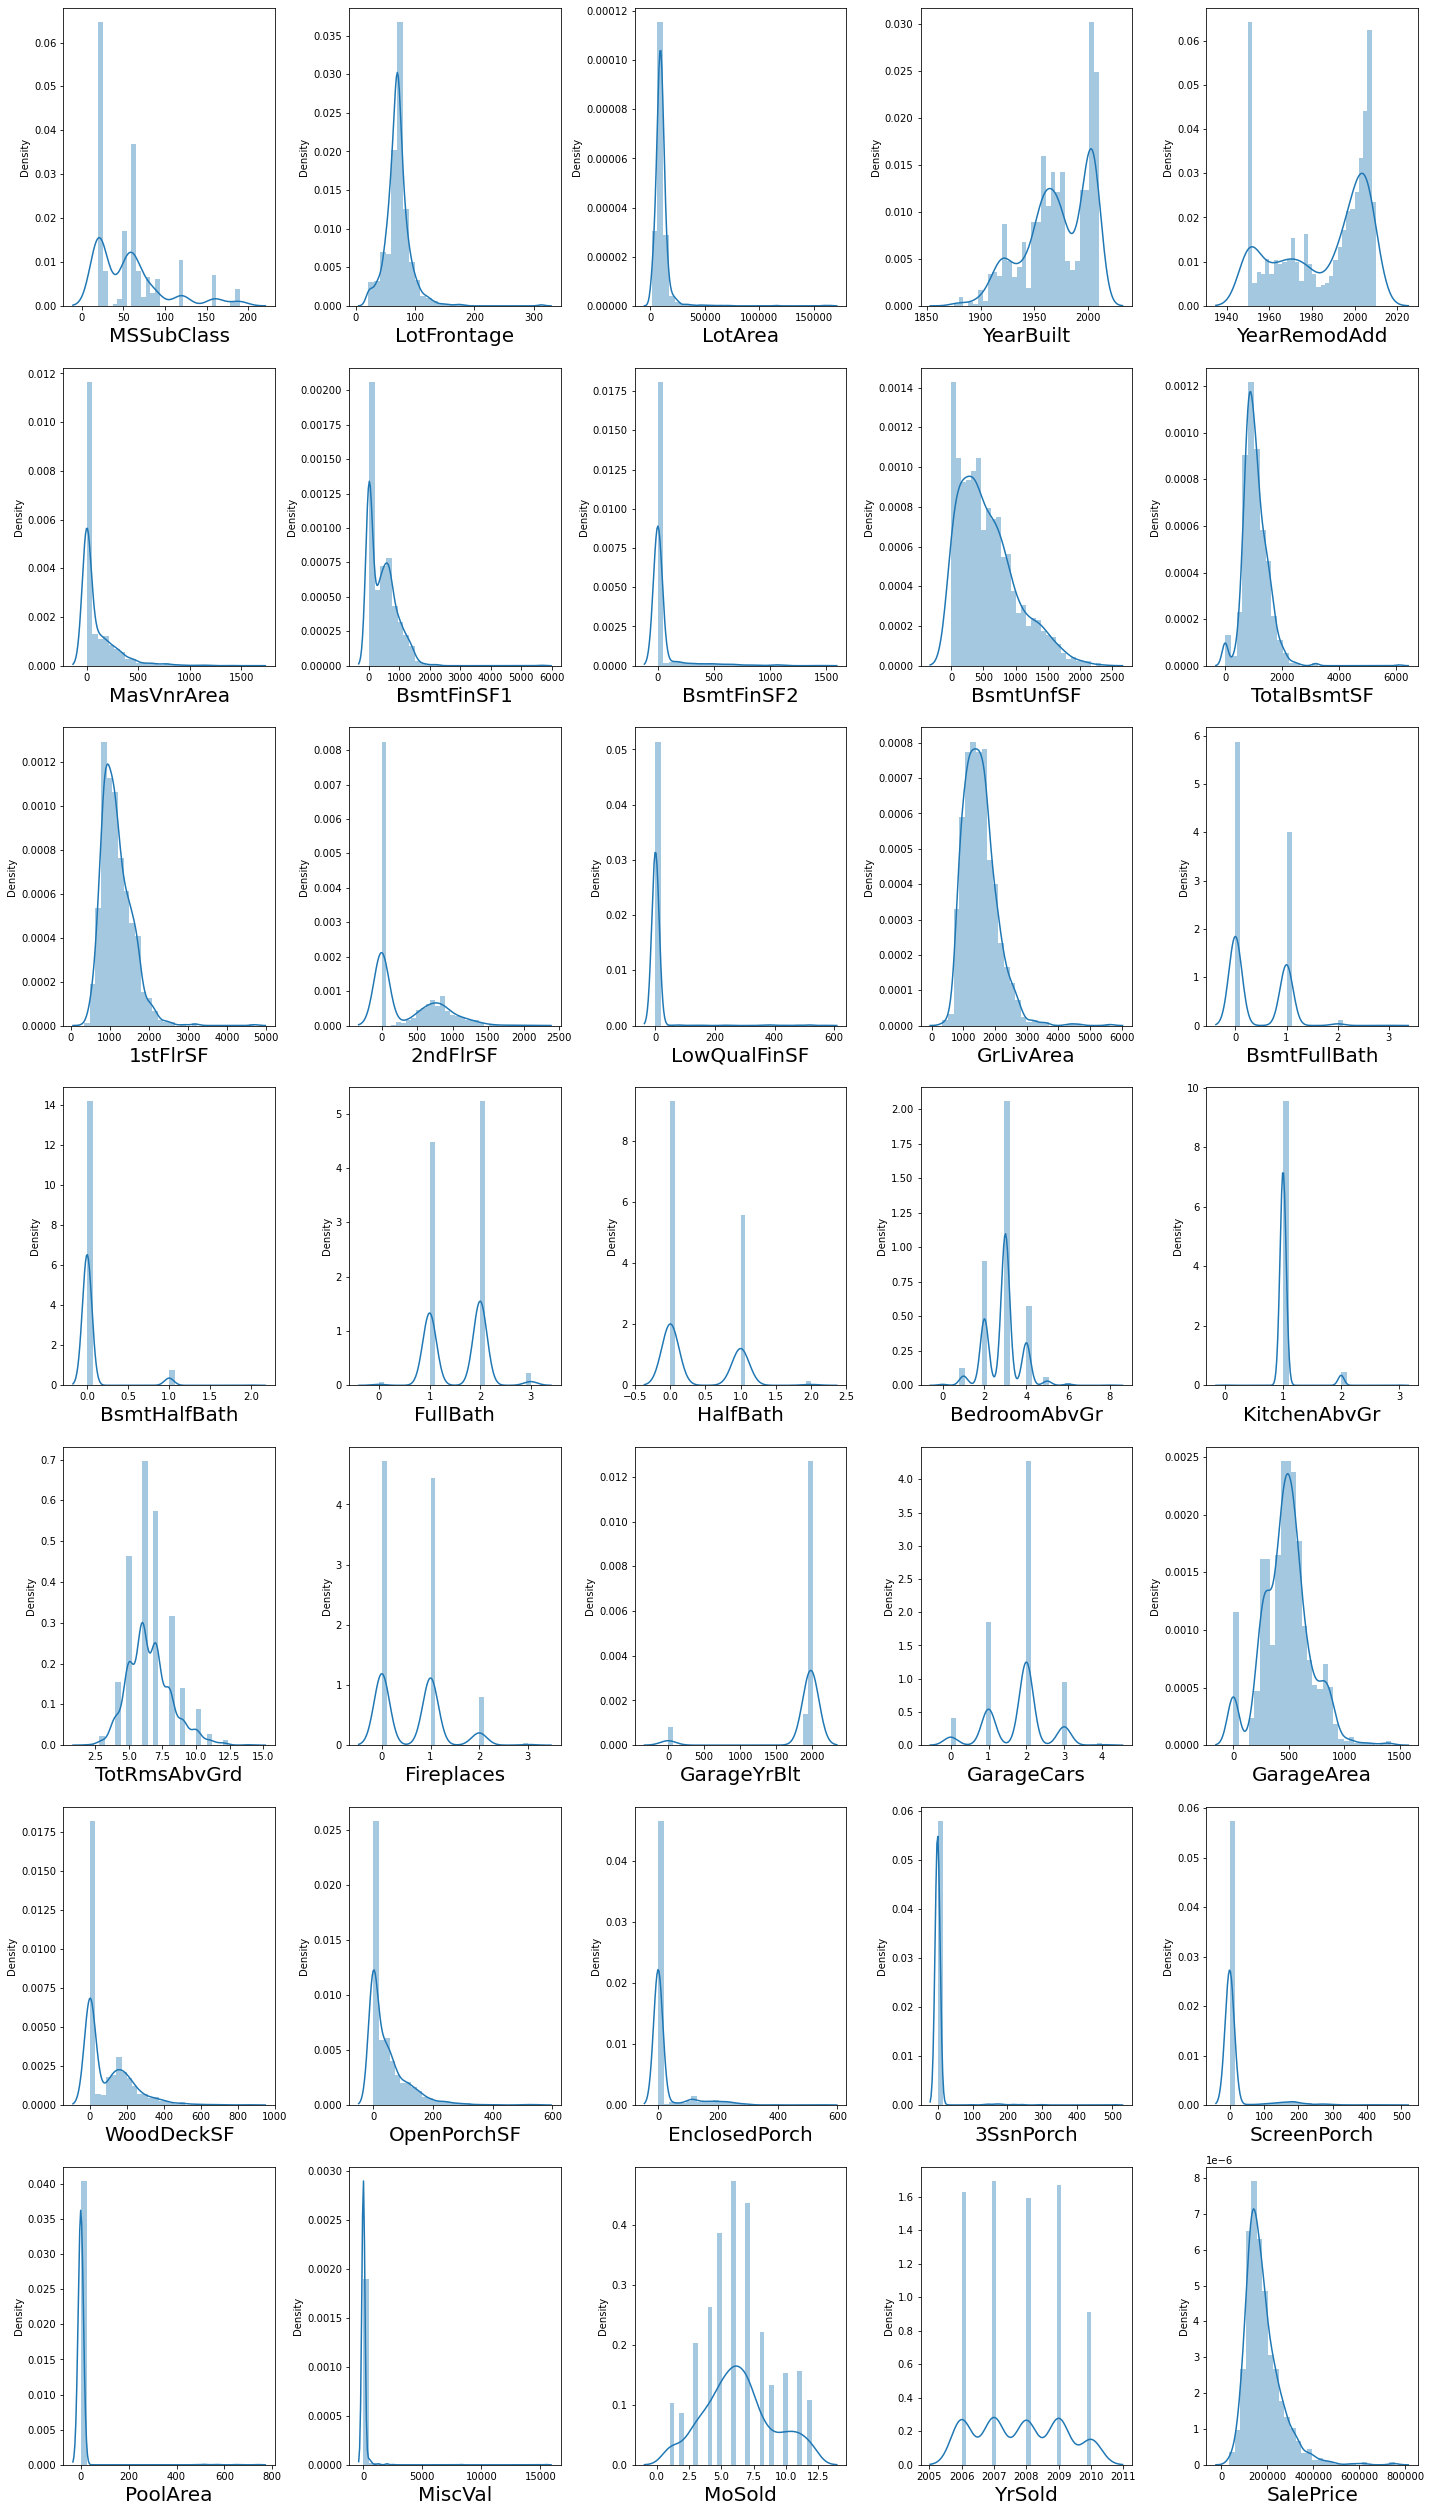

In [128]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in numeric_data:
    if plotnumber<=36:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [129]:
#MSSubclass is the newe house are less in compared to old  houses
#lotfrontage doesnt show any skewness
#Lotsize doesntn show skewness
#Year of built is not considertable
#Year remodAdd is some how similar to year built
#MasvnrArea has some right skewness
#bsmtfinsf1 has also some rihht skewness
#bsmtfinsf1 has no skewness or neglible skewness
#bsmtUnfSf has some right skewness
#Total bsmtunfsf has some left and right skewness but its negligible or least.
#1stFlrSf some what has no skewness
#we can see in 2ndFlrSF that it has skewness,we can also see that lot of data is there on 0 point which shows that people doesnt have much 2nd floor
#lowqualfinsf is somewhat normally distributed
#GRlivArea is normally distributed
#Bsmt Full Bath,BsmtHalfBath,Fullbath,Halfbath,Bedroomabovegr,kitchen above gr,fireplaces shows sign of categorical data 
#Totrmsabvgrd shows some right skewness
#Garageyrbuilt,garage cars shows categorical data
#Garagearea shows some skewness
#Wooddecksf has  rightskewness
#openporchsf shows some right skewness
#Enclosedporch shows negligible sighn of skewness
#other columns also dont show much else related than the above approach.




In [130]:
numeric_data.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [131]:
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

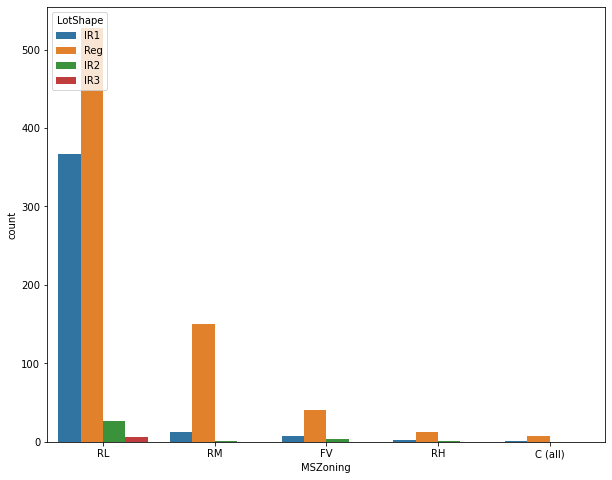

In [132]:
plt.figure(figsize=(10,8))
sns.countplot(df['MSZoning'],hue=df['LotShape'])

In [133]:
#we can see that low density residensial has the most regular shape and if it has irregular then the irregularity is not muchas it has type 1 irregularity houses
#and also we can see that most of the residencial zone have mostly regular lot size.

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LandContour', ylabel='count'>

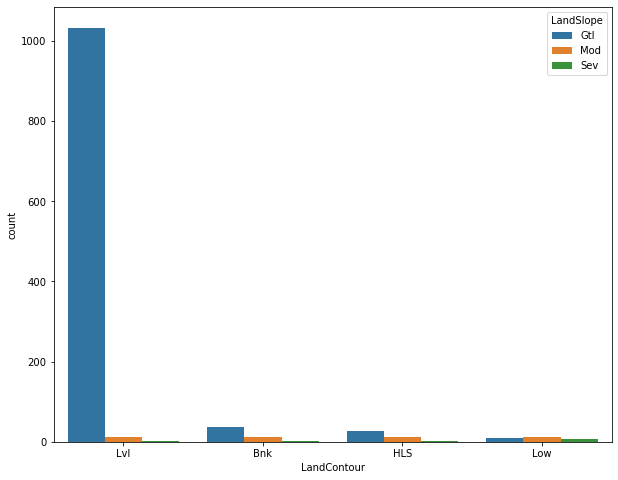

In [134]:
plt.figure(figsize=(10,8))
sns.countplot(df['LandContour'],hue=df['LandSlope'])

In [135]:
#we can visualize that that most of the property has lvled land and gentle slope  

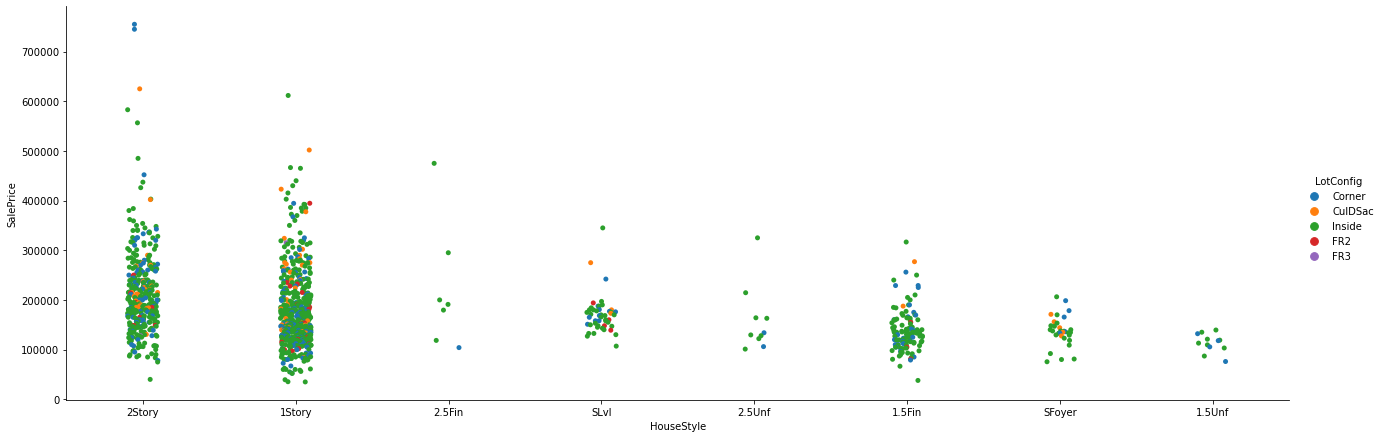

In [136]:
sns.catplot(y='SalePrice',x='HouseStyle',hue='LotConfig',data=df.sort_values('SalePrice',ascending=False),kind='strip',height=6,aspect=3)
plt.show()

In [137]:
#as we can analysy that 2 story builiding and inside lots are valued more in sales

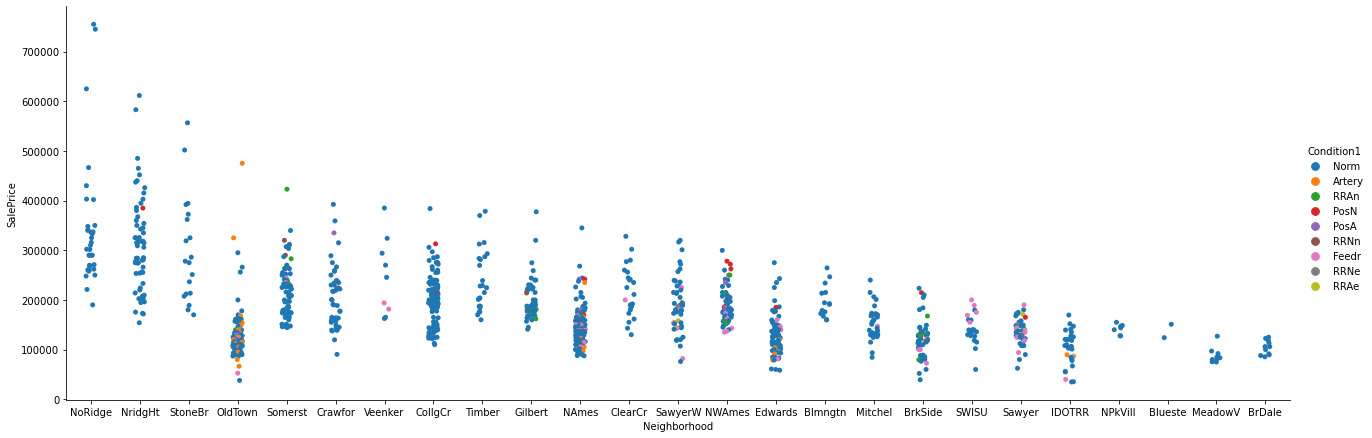

In [138]:
sns.catplot(y='SalePrice',x='Neighborhood',hue='Condition1',data=df.sort_values('SalePrice',ascending=False),kind='strip',height=6,aspect=3)
plt.show()

In [139]:
#we can see that normal condition has attracted the sales price more,we can also see some places are showing higher sales price than otheres
#like,no ridge ,collegecr,names,etc.

In [140]:
#this two plots are also shoing some similar kind of results,as we can see the more the condition rating the better the sales price,
#but we also see that most of the plots have some what 7 to 8 rating in bpoth scenario which shows there is some similarity in both thedata.

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition1', ylabel='count'>

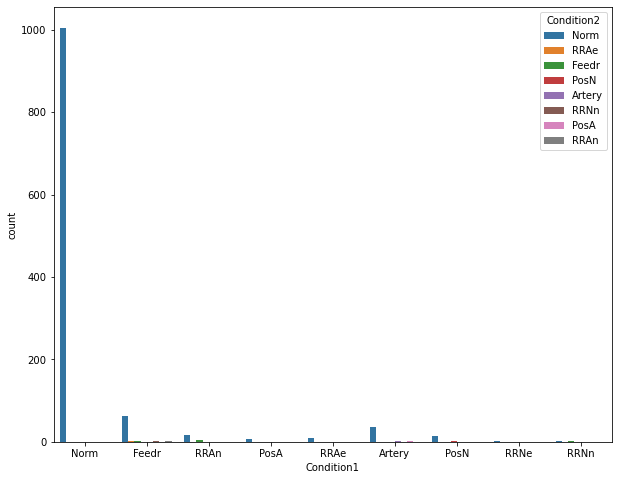

In [141]:
plt.figure(figsize=(10,8))
sns.countplot(df['Condition1'],hue=df['Condition2'])

In [142]:
#this shows some what similar kind of data

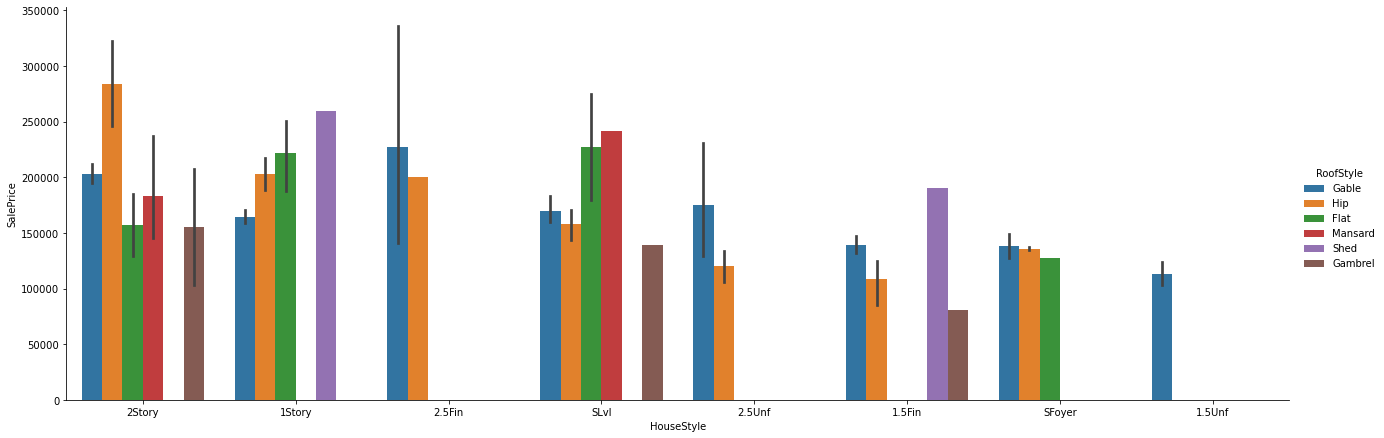

In [143]:
sns.catplot(y='SalePrice',x='HouseStyle',hue='RoofStyle',data=df.sort_values('SalePrice',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [144]:
#we can see 2 story and 1 story have the most sale price,with hip roof style most selling,


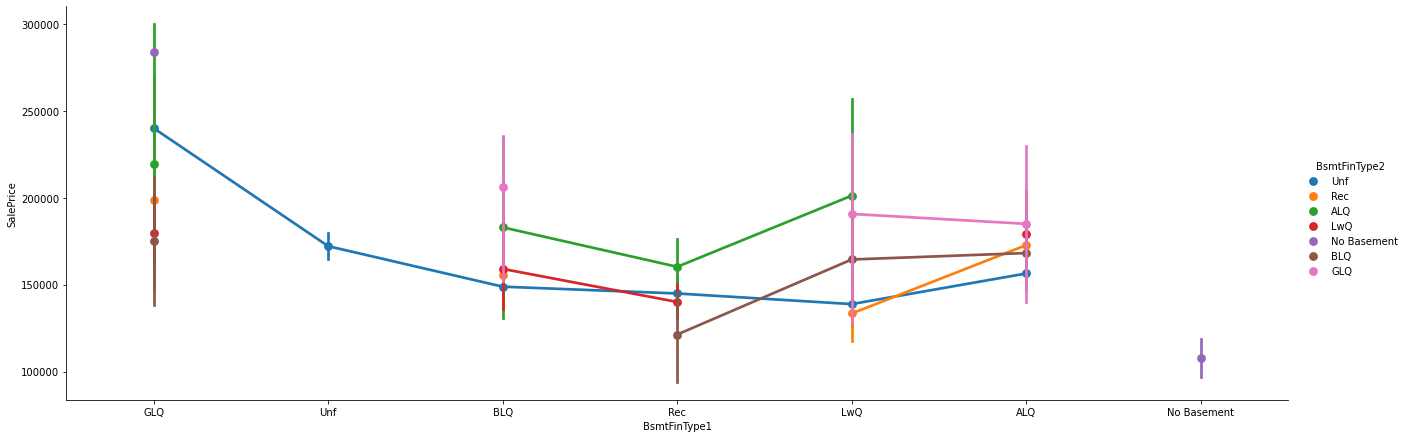

In [145]:
sns.catplot(y='SalePrice',x='BsmtFinType1',hue='BsmtFinType2',data=df.sort_values('SalePrice',ascending=False),kind='point',height=6,aspect=3)
plt.show()

In [146]:
#we can analys that the quaters with no basement doesnt contribute much in the sells than others.
#we can see general quality quaters are showing good result.
#unfinished quater have adiminishing line for type 2 which shows the decrease in sell of the unfinished quaters.


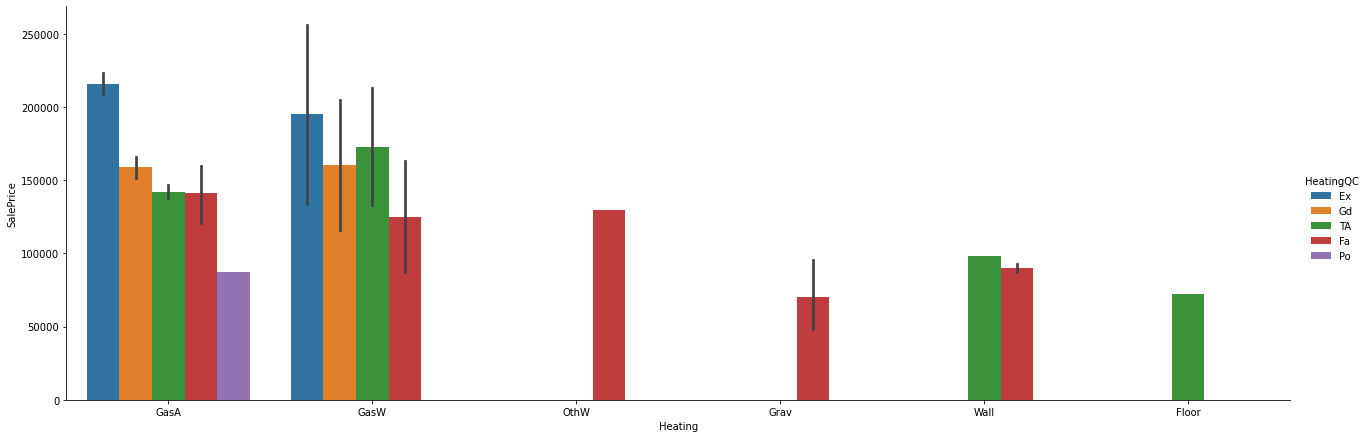

In [147]:
sns.catplot(y='SalePrice',x='Heating',hue='HeatingQC',data=df.sort_values('SalePrice',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [148]:
#we can see gasa is showing good result along with gasw

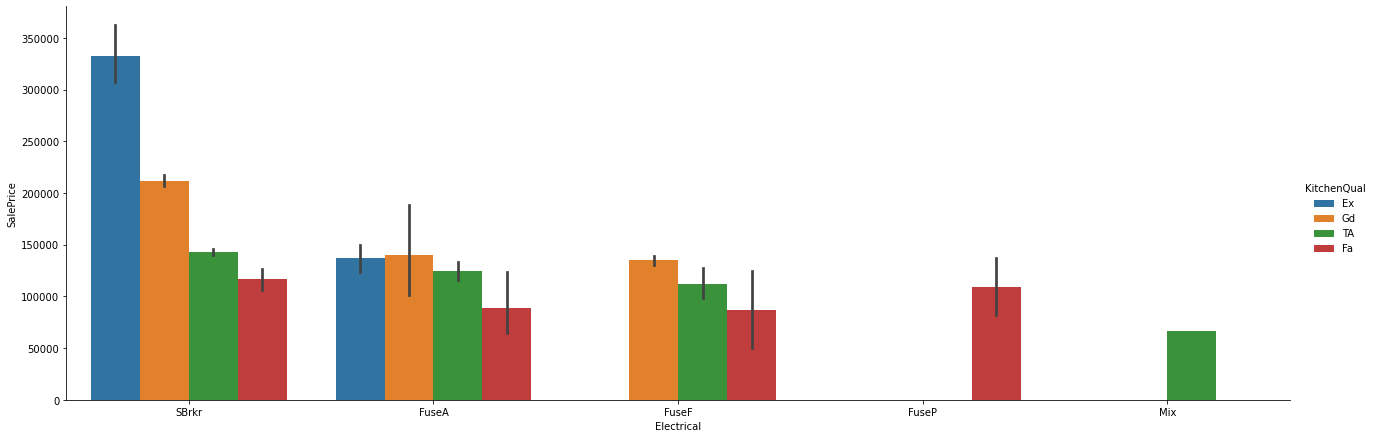

In [149]:
sns.catplot(y='SalePrice',x='Electrical',hue='KitchenQual',data=df.sort_values('SalePrice',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [150]:
#we can see sbrkr which is standard fuse getting a excellent review and contribute very much to the sells.

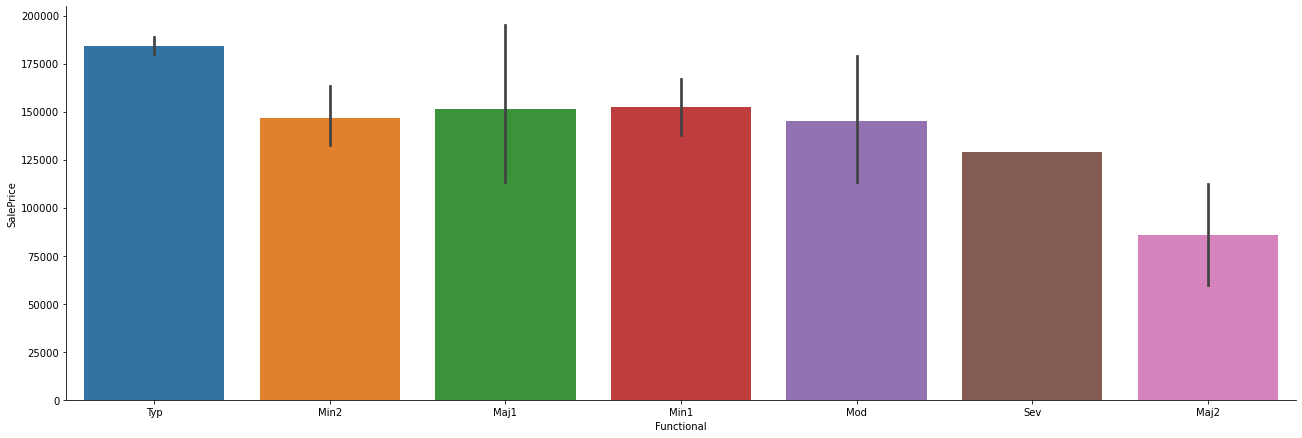

In [151]:
sns.catplot(y='SalePrice',x='Functional',data=df.sort_values('SalePrice',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [152]:
#we can see basic functioning of the houses typical ,which is generating most sells.


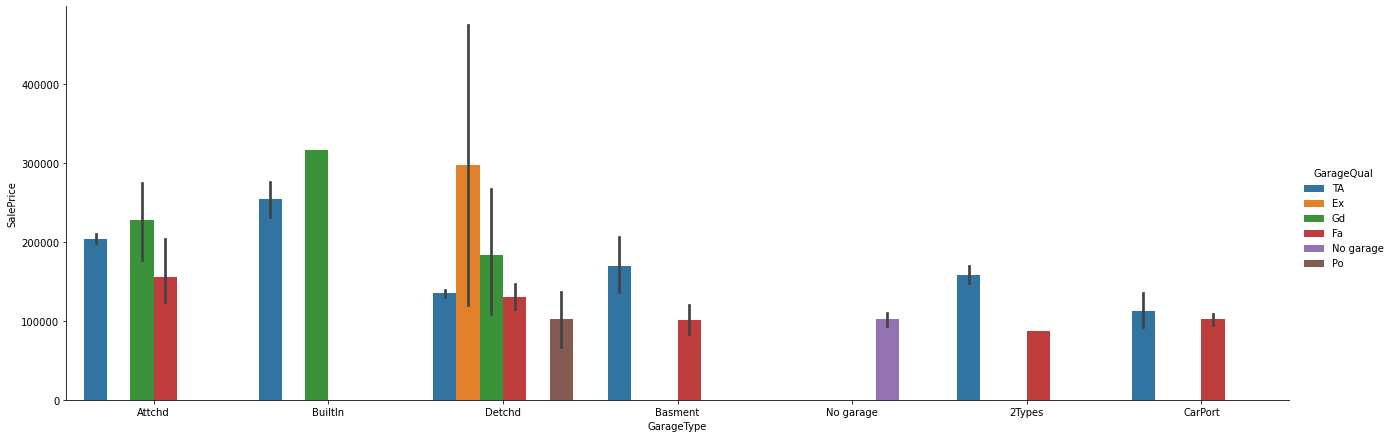

In [153]:
sns.catplot(y='SalePrice',x='GarageType',hue='GarageQual',data=df.sort_values('SalePrice',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [154]:
#detached garage with execellent quality shows a great sales hike than others.

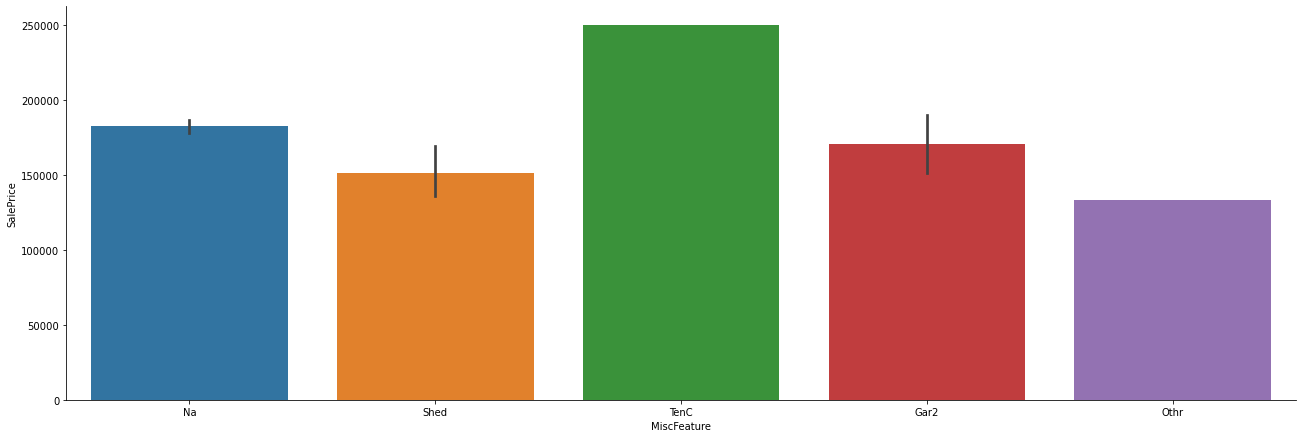

In [155]:
sns.catplot(y='SalePrice',x='MiscFeature',data=df.sort_values('SalePrice',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [156]:
#we can see tenniscourt isone of theb reason to generate sell .withshed and 2nd garage also generate lum sum amount of sales

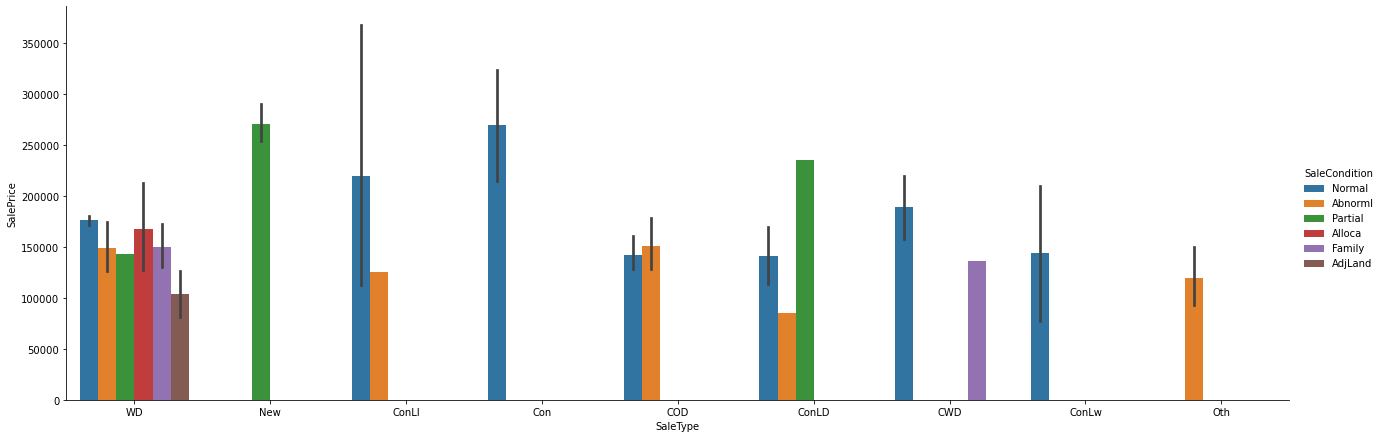

In [157]:
sns.catplot(y='SalePrice',x='SaleType',hue='SaleCondition',data=df.sort_values('SalePrice',ascending=False),kind='bar',height=6,aspect=3)
plt.show()

In [158]:
#we can see new homes sells are partially increasing too the fullest.
#we can see warranty deed conventional are generating a good amount of sales with  more ever or not  normal sales condition.

In [160]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [162]:
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [163]:
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [165]:
en=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [166]:
en=LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=en.fit_transform(df_test[i].values.reshape(-1,1))

In [167]:
len(df.columns)

79

In [169]:
len(df_test.columns)

78

In [170]:
y=df['SalePrice']
X=df.drop(columns = ['SalePrice'])

In [171]:
xx=numeric_data.drop(columns=['SalePrice'])

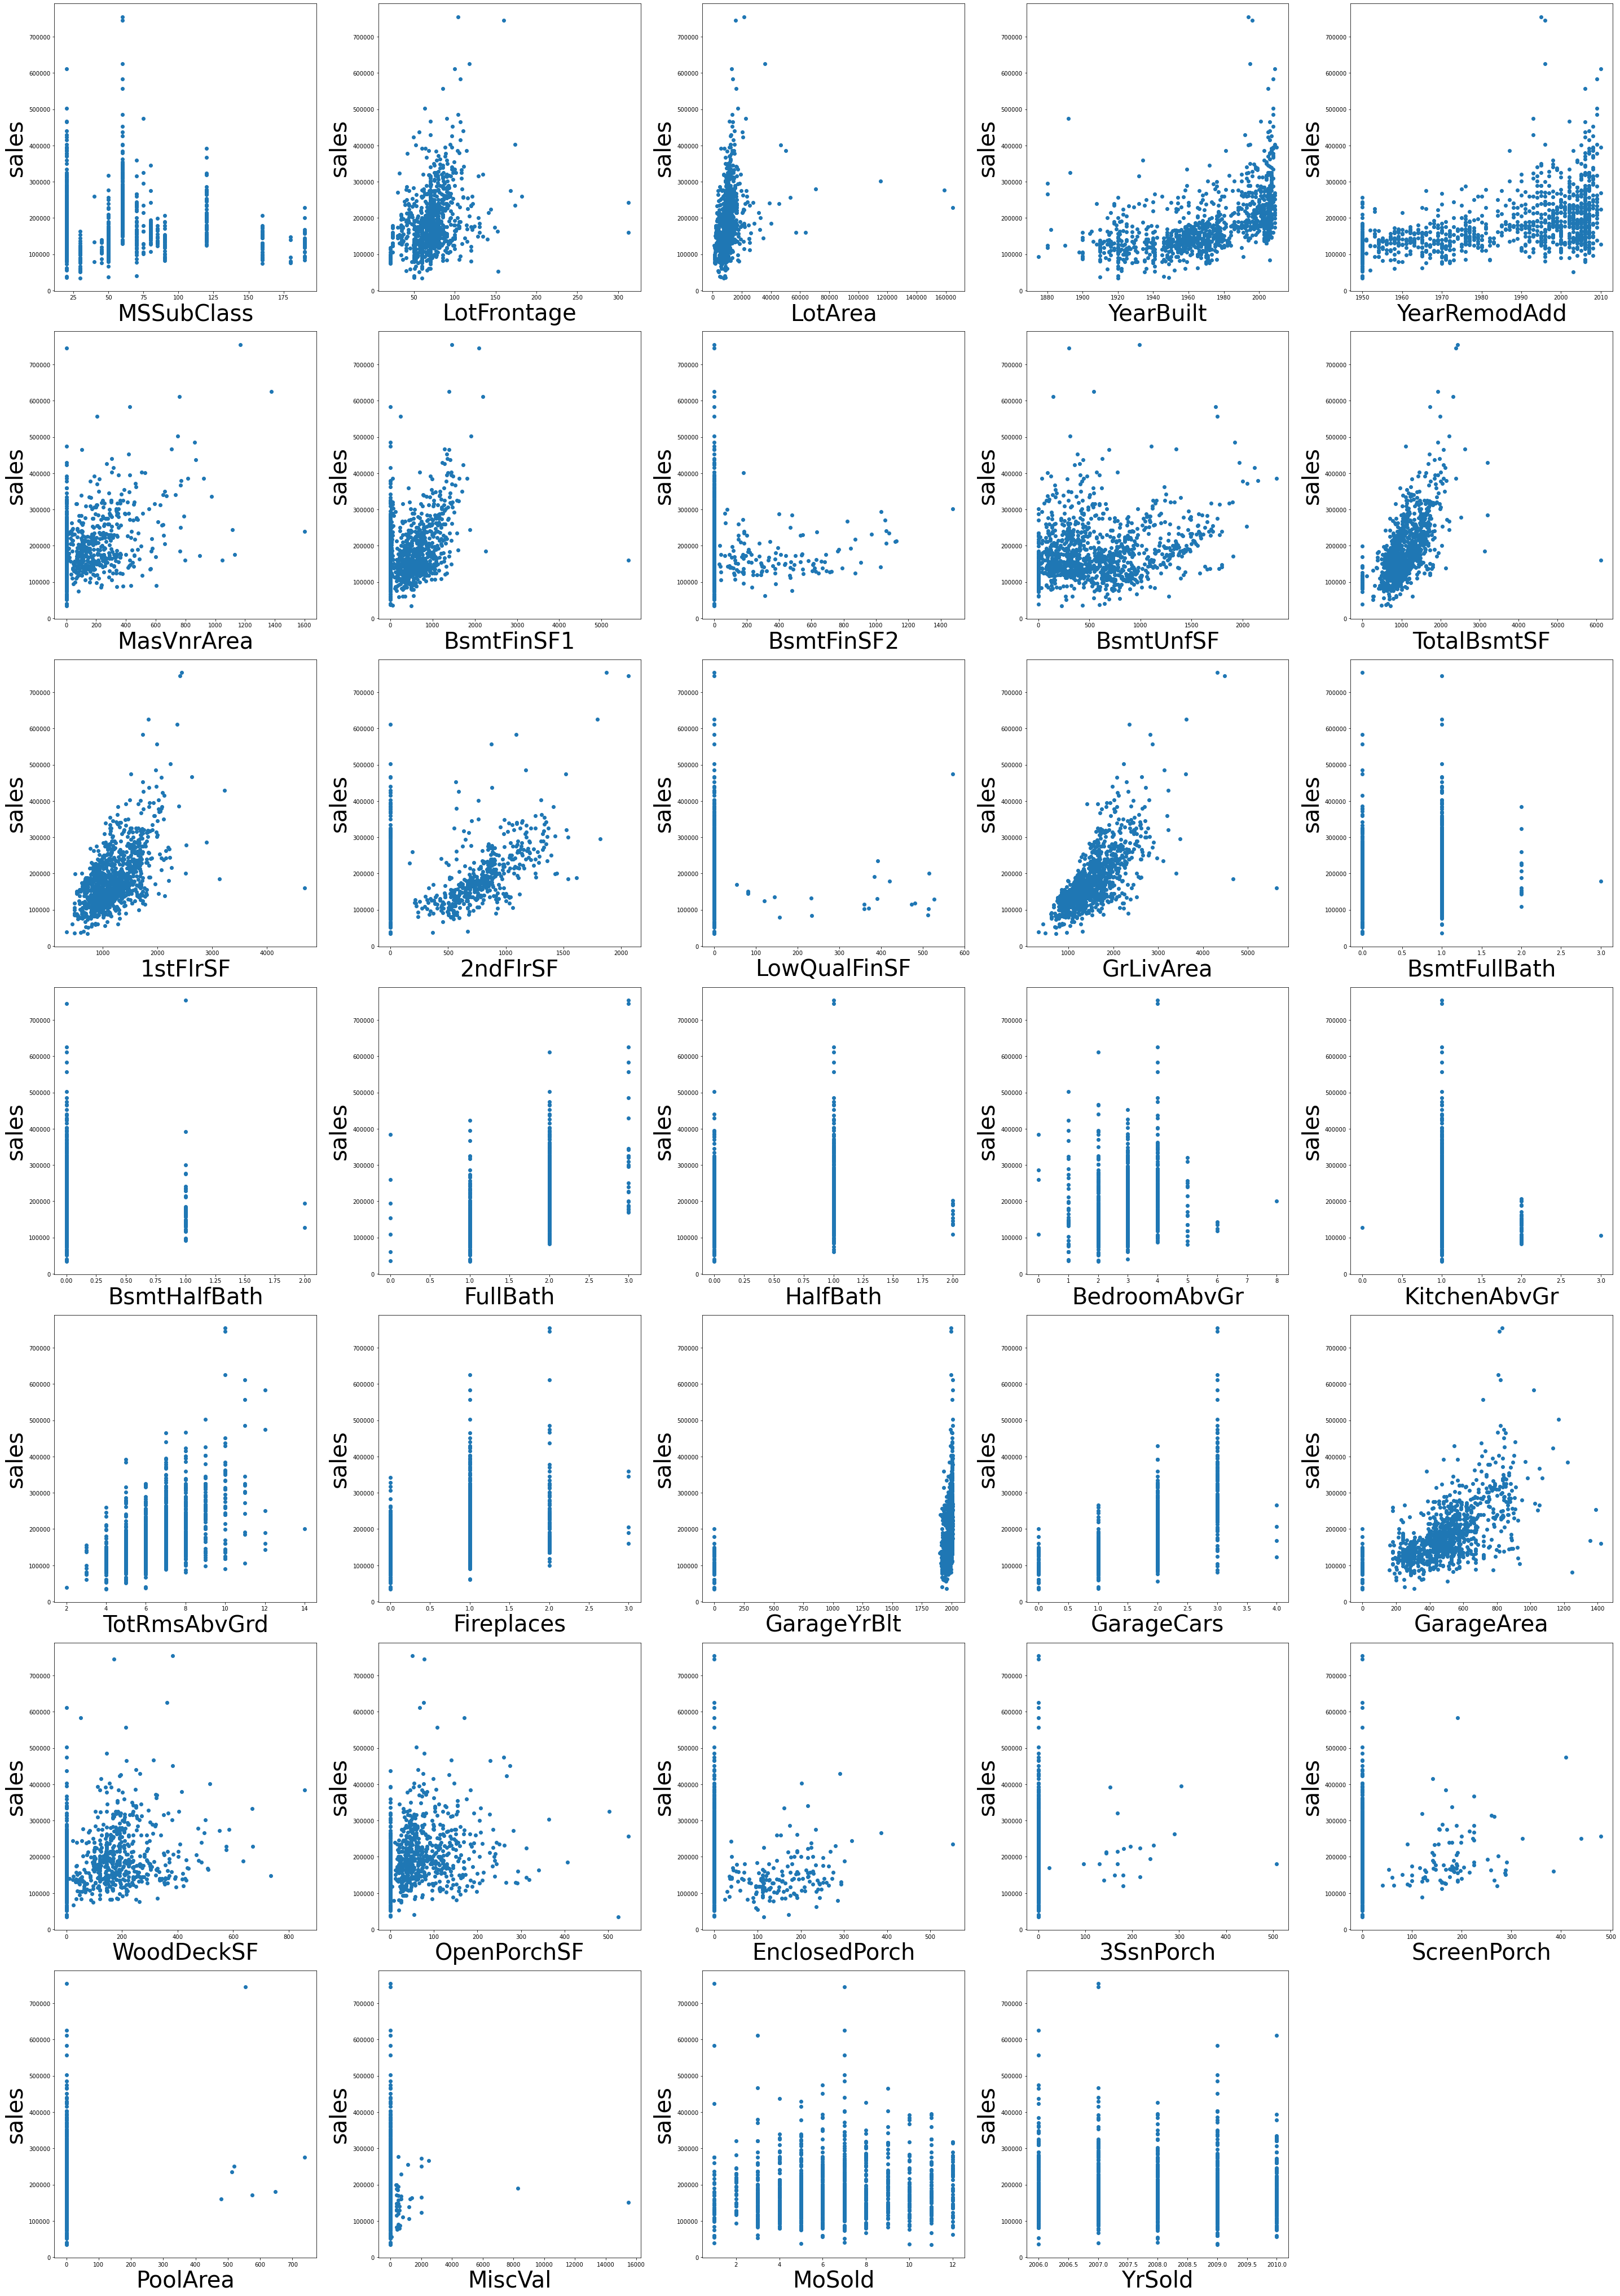

In [172]:
plt.figure(figsize=(40,80),facecolor='white')
plotnumber = 1

for  column in xx:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=40)
        plt.ylabel('sales',fontsize=40)
         
    plotnumber+=1
plt.tight_layout()

In [173]:
# as we are going through this plot we can see there are many categorical plot also which r there to interpreted ,
#lets start we the numerical data from this half of the xx dataframe
#Lotfrontage of 50 to 100 is generating most sales
#10 to 15 thousand lot area  generating most sALES
#masvnrareaand openpouch sf has a direct relation and here a good area is between 200-400


In [174]:
df.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336234 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069476 -0.023328  0.140215   
LotFrontage     -0.336234 -0.069476     1.000000  0.296790 -0.035131   
LotArea         -0.124151 -0.023328     0.296790  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035131 -0.263973  1.000000   
Alley            0.107699 -0.415953    -0.084593 -0.037048 -0.000978   
LotShape         0.104485  0.053655    -0.138975 -0.189201 -0.012941   
LandContour     -0.021387  0.001175    -0.073725 -0.159038  0.105226   
LotConfig        0.076880 -0.027246    -0.189317 -0.152063  0.000153   
LandSlope       -0.014930 -0.023952     0.044283  0.395410 -0.141572   
Neighborhood     0.013918 -0.251833     0.066073  0.010707  0.001420   
Condition1      -0.042474 -0.025651    -0.026488  0.029520  0.002189   
Condition2      -0.044319  0.031959     0.010896  0.040096  0.001406   
BldgType         0.731815 -0.024776    -0.402558 -0.215345 -0.013606   
HouseStyle       0.381585 -0.110991     0.055345 -0.040637  0.016793   
OverallQual      0.070462 -0.134037     0.229981  0.107188  0.057140   
OverallCond     -0.056978  0.189553    -0.047851  0.017513  0.031082   
YearBuilt        0.023988 -0.299732     0.112000  0.005506  0.020292   
YearRemodAdd     0.056618 -0.174586     0.089513  0.027228  0.057866   
RoofStyle       -0.100641  0.000913     0.146568  0.038615 -0.006875   
RoofMatl        -0.032214  0.009719     0.081703  0.194142  0.007889   
Exterior1st     -0.090178 -0.012037     0.088520  0.048265  0.012482   
Exterior2nd     -0.120022  0.005548     0.111287  0.027328  0.014618   
MasVnrType      -0.013252 -0.033521    -0.032509 -0.005204  0.000822   
MasVnrArea       0.027814 -0.063848     0.188907  0.121084  0.024583   
ExterQual       -0.024133  0.184815    -0.170588 -0.057865  0.044509   
ExterCond        0.004186 -0.099269     0.044890  0.011438  0.017738   
Foundation       0.053951 -0.244844     0.090649 -0.021195  0.032701   
BsmtQual        -0.087565  0.157875    -0.146591 -0.064290 -0.035718   
BsmtCond        -0.015157  0.005917     0.049980  0.015626 -0.019762   
BsmtExposure    -0.065262  0.036035    -0.126039 -0.136699  0.065031   
BsmtFinType1     0.009124  0.025485    -0.027034 -0.049878 -0.008805   
BsmtFinSF1      -0.052236 -0.034161     0.227732  0.221851 -0.009066   
BsmtFinType2     0.039293 -0.028454     0.002437 -0.073209  0.040511   
BsmtFinSF2      -0.062403  0.027055     0.001253  0.056656  0.003550   
BsmtUnfSF       -0.134170 -0.032638     0.115628  0.006600  0.024205   
TotalBsmtSF     -0.214042 -0.058896     0.356180  0.259733  0.016422   
Heating          0.047734  0.051188    -0.026282 -0.020394  0.006981   
HeatingQC       -0.001994  0.119852    -0.079376 -0.003337 -0.047968   
CentralAir      -0.113883 -0.015887     0.076291  0.051182  0.043024   
Electrical       0.045533 -0.079205     0.066544  0.050388  0.038720   
1stFlrSF        -0.227927 -0.033095     0.402864  0.312843  0.011486   
2ndFlrSF         0.300366 -0.048968     0.089816  0.059803  0.040957   
LowQualFinSF     0.053737  0.012098     0.008087 -0.001915  0.007352   
GrLivArea        0.086448 -0.064125     0.374000  0.281360  0.043322   
BsmtFullBath     0.004556 -0.007287     0.092807  0.142387 -0.036483   
BsmtHalfBath     0.008207  0.006345     0.001375  0.059282  0.013788   
FullBath         0.140807 -0.188837     0.171842  0.123197  0.033208   
HalfBath         0.168423 -0.121209     0.047149  0.007271  0.045146   
BedroomAbvGr    -0.013283 -0.001906     0.236946  0.117351  0.027587   
KitchenAbvGr     0.283506  0.026744    -0.002082 -0.013075  0.012304   
KitchenQual     -0.011378  0.111689    -0.175895 -0.064278 -0.012056   
TotRmsAbvGrd     0.051179 -0.031062     0.318941  0.184546  0.038259   
Functional       0.022913 -0.091684     0.039337 -0.033165 -0.015309   
Fireplaces      -0.035792  0.010658     0.228494  0.285

<AxesSubplot:>

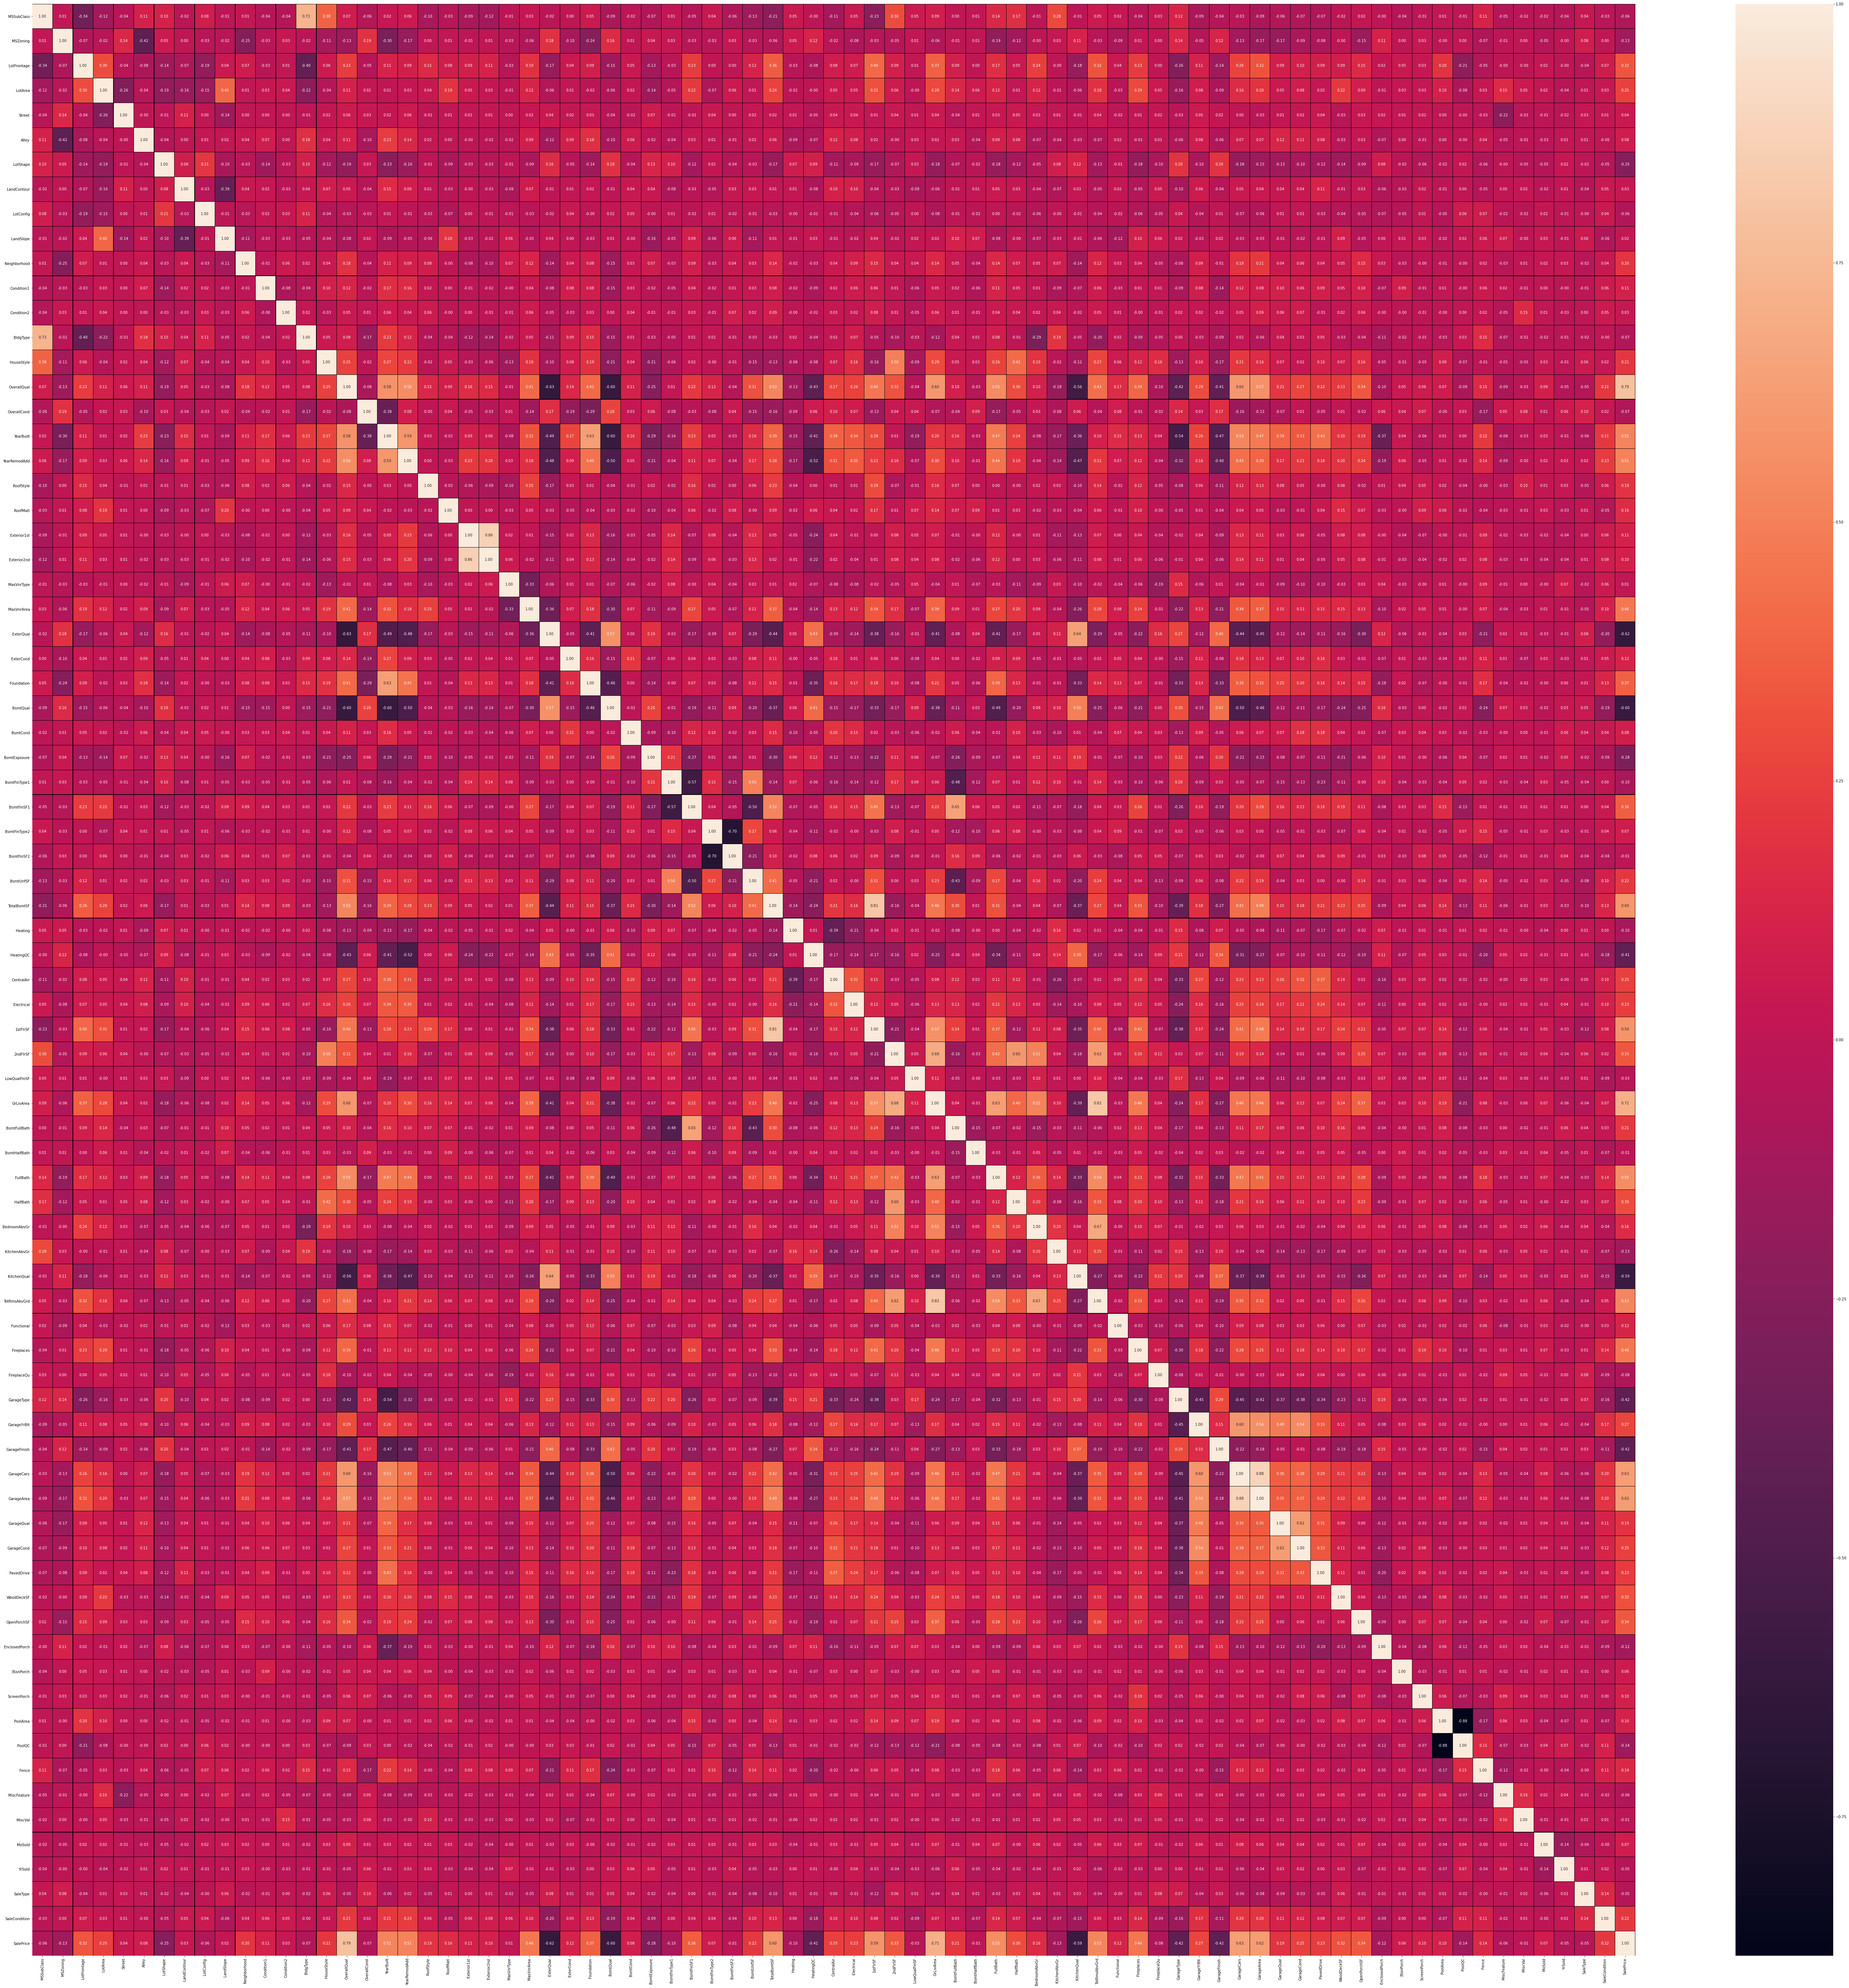

In [175]:
plt.figure(figsize=(100,100),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

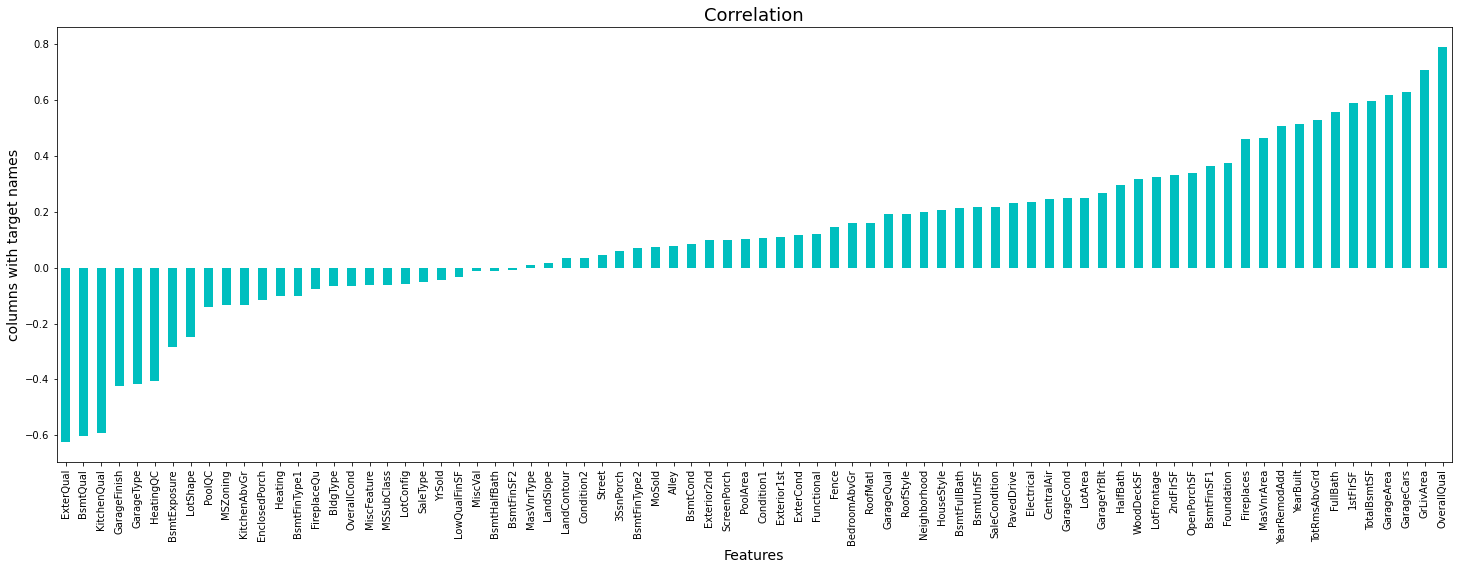

In [176]:
plt.figure(figsize=(25,8))
df.corr()['SalePrice'].sort_values(ascending=True).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [177]:
#we can see overall quality ,garage options, total basement asizeand etc have direct relation  with saleprice
#Externalquality,bsmt quality,garage finish heating quality are highly inversly related to sale price

In [178]:
pd.options.display.max_rows=1168

In [179]:
x=df.drop("SalePrice",axis=1)
y=df['SalePrice']

In [180]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selection = SelectKBest(score_func=chi2)
fit = selection.fit(x,y)

In [181]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [182]:
print(featureScores.nlargest(10,'Score'))  #print10 best features
feat=list(featureScores.nlargest(10,'Score')['Features'])

        Features         Score
3        LotArea  5.746267e+06
73       MiscVal  5.669726e+06
42      2ndFlrSF  3.837320e+05
34    BsmtFinSF2  3.407783e+05
32    BsmtFinSF1  3.338184e+05
69      PoolArea  3.241779e+05
24    MasVnrArea  2.444930e+05
35     BsmtUnfSF  2.402027e+05
43  LowQualFinSF  2.103716e+05
44     GrLivArea  1.592379e+05


In [183]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

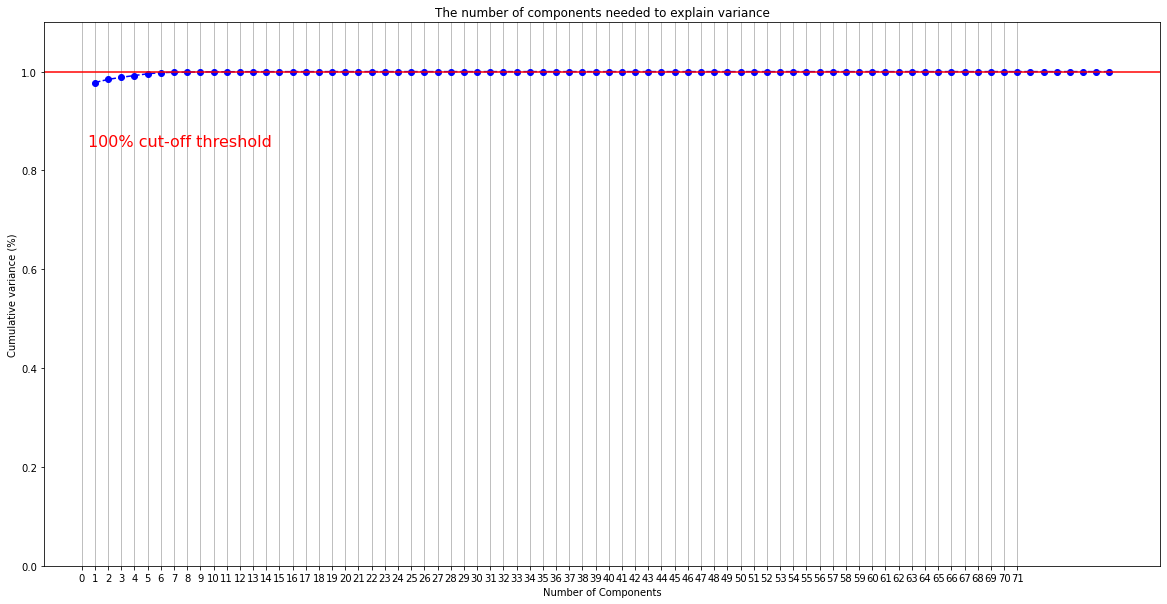

In [184]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 79, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 72, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [185]:
x.shape

(1168, 78)

## model building

In [186]:
sc=StandardScaler()# standerdizing the data
x=sc.fit_transform(x)
x

array([[ 1.50830058, -0.02164599, -0.03599365, ..., -0.60548713,
         0.33003329,  0.20793187],
       [-0.87704243, -0.02164599,  1.07854983, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.07709478, -0.02164599,  0.94480461, ..., -0.60548713,
         0.33003329,  0.20793187],
       ...,
       [ 2.46243779, -0.02164599, -2.08675364, ...,  0.8992128 ,
         0.33003329,  0.20793187],
       [ 0.31562908, -4.76211672, -0.92762843, ...,  0.14686284,
         0.33003329,  0.20793187],
       [ 0.07709478, -0.02164599, -0.03599365, ..., -1.3578371 ,
         0.33003329,  0.20793187]])

In [187]:
df_test=sc.fit_transform(df_test)
df_test

array([[-0.85605433, -0.28700579,  1.18130104, ..., -0.65090813,
         0.23029007,  0.14865423],
       [ 1.43198105, -0.28700579,  0.03172677, ...,  0.86355541,
        -6.49418003, -3.32390858],
       [-0.85605433, -0.28700579,  0.03172677, ...,  0.86355541,
         0.23029007,  0.14865423],
       ...,
       [-0.85605433, -0.28700579,  0.03172677, ...,  1.62078718,
         0.23029007,  0.14865423],
       [-0.16964372,  1.80813647, -0.98260347, ..., -1.4081399 ,
         0.23029007,  0.14865423],
       [ 2.3471952 ,  1.80813647, -2.06455572, ..., -1.4081399 ,
         0.23029007,  0.14865423]])

In [188]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.9122306404139859
At random state0,the testing  accuracy is :- 0.5301123902013845


At random state1,the training accuracy is :- 0.8475063800544131
At random state1,the testing  accuracy is :- 0.7909021592611912


At random state2,the training accuracy is :- 0.9041868208236068
At random state2,the testing  accuracy is :- 0.6042167721062095


At random state3,the training accuracy is :- 0.8311652674553092
At random state3,the testing  accuracy is :- 0.8280737862750119


At random state4,the training accuracy is :- 0.8798721696656904
At random state4,the testing  accuracy is :- 0.6215763273413124


At random state5,the training accuracy is :- 0.9179969020303831
At random state5,the testing  accuracy is :- 0.6159219845762856


At random state6,the training accuracy is :- 0.8416081685994351
At random state6,the testing  accuracy is :- 0.7979415712949449


At random state7,the training accuracy is :- 0.841531440130908
At random state7,the testin

In [189]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=14)

In [190]:
lr.fit(X_train,Y_train)

LinearRegression()

In [191]:
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.7626379140133326


In [192]:
#we can see that the accuracy is same as the random state.

In [193]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is -5.085685916094993e+22 and accuracy score for training is -0.7563602422817353 and accuracy score for testing is 0.7626379140133326


At cross fold 3 the cv score is 0.706235852034324 and accuracy score for training is -0.7563602422817353 and accuracy score for testing is 0.7626379140133326


At cross fold 4 the cv score is 0.7462268676907389 and accuracy score for training is -0.7563602422817353 and accuracy score for testing is 0.7626379140133326


At cross fold 5 the cv score is 0.7308564388251658 and accuracy score for training is -0.7563602422817353 and accuracy score for testing is 0.7626379140133326


At cross fold 6 the cv score is 0.6881503517266143 and accuracy score for training is -0.7563602422817353 and accuracy score for testing is 0.7626379140133326


At cross fold 7 the cv score is 0.6687354222460394 and accuracy score for training is -0.7563602422817353 and accuracy score for testing is 0.7626379140133326


At cross fold 8 the cv score is

In [194]:
#as the cv score  impacted the training accuracy  we are taking cv =5

In [195]:
#regularizatioon

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,30)),'selection':['cyclic', 'random']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)



C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2979749095.5511475, tolerance: 383124325.3477856
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1196635288.5498657, tolerance: 348190374.4583286
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463420393.0654297, tolerance: 343640605.09666854
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

{'alpha': 10, 'random_state': 3, 'selection': 'random'}


C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5078290885.786621, tolerance: 371697740.34240556
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10200439439.412354, tolerance: 383124325.3477856
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11353064758.201233, tolerance: 371697740.34240556
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

In [197]:
ls=Lasso(alpha=10,random_state=3,selection='random')
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21898457720.181213, tolerance: 438778190.6969595
  model = cd_fast.enet_coordinate_descent(


0.7641557416762716

In [198]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16867334576.8573, tolerance: 560812640.5633906
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27956468676.544067, tolerance: 592761789.2737207
  model = cd_fast.enet_coordinate_descent(
C:\Users\91954\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32190611747.186646, tolerance: 619092285.0028337
  model = cd_fast.enet_coordinate_descent(


0.7314215354981024

In [199]:
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rs=Ridge()
clf=GridSearchCV(rs,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)


{'alpha': 10, 'random_state': 7, 'solver': 'saga'}


In [200]:
rs=Ridge(alpha=10,random_state=7,solver='saga')
rs.fit(X_train,Y_train)
rs.score(X_train,Y_train)
pred_rs=rs.predict(X_test)
rss=r2_score(Y_test,pred_ls)
rss

0.7641557416762716

In [201]:
cv_score=cross_val_score(rs,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.737225938484951

In [202]:
# our model is giving good accuracy from regularization but the r2 score and cv_mean is having not much difference after all this regularization.

In [203]:
#ensemble techniques

In [216]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [217]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

r2_score: 84.31983245832015
cross_val_score: 85.03518597287363


In [206]:
#random rainforest improves the the score 

In [207]:
#knn model

In [208]:
from sklearn.neighbors import KNeighborsRegressor
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 5}


In [209]:
kn= KNeighborsRegressor(n_neighbors=5,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=r2_score(Y_test,pred_decision)
print('r2_score:',knn*100)
knscore=cross_val_score(kn,x,y,cv=4)
knc=knscore.mean()
print('cross_val_score:',knc*100)

r2_score: 71.41529732283001
cross_val_score: 71.70022788859868


In [210]:
#knn is also giving more score than linera model 

In [211]:
from sklearn.ensemble import BaggingRegressor
parameters={'max_features':[1,2,3],'random_state':list(range(0,20))}
bg=BaggingRegressor()
clf=GridSearchCV(bg,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'max_features': 3, 'random_state': 10}


In [212]:
bg=BaggingRegressor(max_features=3,random_state=10)
bg.fit(X_train,Y_train)
bg.score(X_train,Y_train)
pred_decision=bg.predict(X_test)
bgg=r2_score(Y_test,pred_decision)
print('r2_score:',bgg*100)
bgscore=cross_val_score(bg,x,y,cv=4)
bgc=bgscore.mean()
print('cross_val_score:',bgc*100)

r2_score: 60.38533174428198
cross_val_score: 61.04563280066018


In [213]:
#bagging is not giving good score

In [214]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'splitter': 'best'}


In [215]:
dt=DecisionTreeRegressor(criterion='mae',splitter='best',max_features="auto")
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dtt=r2_score(Y_test,pred_decision)
print('r2_score:',dtt*100)
dtscore=cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

r2_score: 66.89684792129503
cross_val_score: 71.16620266144587


In [218]:
r2_score= {
    'model':['linear regression', 'random forest','KNeighborsRegressor','bagging','DecisionTreeRegressor'],
    'R2score':[76.26379140133326,84.31983245832015,71.41529732283001, 60.38533174428198,66.28563549094001]
    
}
r2_Score=pd.DataFrame(data=r2_score)
r2_Score.sort_values(by=['R2score'], ascending=False)

model    R2score
1          random forest  84.319832
0      linear regression  76.263791
2    KNeighborsRegressor  71.415297
4  DecisionTreeRegressor  66.285635
3                bagging  60.385332

In [219]:
#we conclude random forest has the best model 

In [220]:
filename='housing sales.pkl'
pickle.dump(rf,open(filename,'wb'))


In [221]:
loaded_model=pickle.load(open('housing sales.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.8431983245832014


In [223]:
df_test.shape

(292, 78)

In [225]:
df_test.shape

(292, 78)

In [226]:
conclusion=pd.DataFrame([loaded_model.predict(df_test)],index=['Predicted'])
conclusion

0          1          2         3          4          5    \
Predicted  290343.63  204226.48  262195.38  165531.4  248453.68  103495.88   

                 6          7         8          9    ...        282  \
Predicted  149066.37  290973.52  226759.1  170065.87  ...  147692.75   

                 283        284       285        286        287        288  \
Predicted  304182.27  154451.15  127881.1  181422.54  216967.26  142671.79   

                 289        290        291  
Predicted  139569.15  142330.84  121222.31  

[1 rows x 292 columns]

In [ ]:
# this is the model